#Introduction

The objective of this Notebook is to extract and interpret the underlying structure of online discourse through sentiment analysis and topic modelling using a restricted social media dataset. The goal is to identify emotional tone, dominant themes, and discursive dynamics within a large volume of textual data.

> Sentiment analysis is a process of computationally identifying and categorising opinions expressed in a piece of textual content, particularly to decide the writer’s attitude, emotional tone as well as the subjective information expressed in text, focusing on opinions towards a particular topic, product or issue (Medhat et al., 2014), then identifying whether the data is positive, negative, or neutral.

> Topic Modelling uses unsupervised machine learning (ML) to analyse and identify groups of similar words within a text corpus (large collection of text based data) (Pykes, 2023). This process typically begins by establishing the number of topics, by means of a coherence and perplexity score. Following this, ML algorithms such as Latent Dirichlet Allocation (LDA) are applied to automatically extract meaningful topics from the text (Chen et al., 2020). Topic modelling is often used to uncover hidden themes or topics with huge amounts of unstructured text.

#Installing Packages and Importing Necessary Libraries

In [ ]:
!pip install -q TextBlob
!pip install -q pivottablejs
!pip install -q ydata-profiling
!pip install -q pygwalker
!pip install -q lime
!pip install -q numba==0.56.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import json
import io, os, random
import re
import spacy
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter, defaultdict
from textblob import TextBlob
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import f1_score
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from ydata_profiling import ProfileReport
import pygwalker as pyg
from pivottablejs import pivot_ui
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from tabulate import tabulate
from collections import Counter

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Configuration
warnings.filterwarnings('ignore')
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
BASE_STOP_WORDS = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

#Dataset Familiarisation

The dataset used in this study was sourced from X (formerly Twitter) and includes posts collected over the period 30 January 2023 to 19 April 2023. The dataset captures a snapshot of public discourse on the platform during this timeframe, serving as the foundation for subsequent sentiment analysis and topic modelling. The dataset contains the following variables:

- Tweet_ID: A unique alphanumeric identifier for each post.

- Username: The user’s handle on the platform.

- Text: The textual content of the tweet.

- Retweets: The number of times the tweet was reshared.

- Likes: The number of likes received by the tweet.

- Timestamp: The date and time of publication.

To ensure compliance with ethical and privacy guidelines in research involving social media data, the Tweet_ID was retained as a unique identifier for referencing and reproducibility purposes, while the Username variable was removed to safeguard user anonymity. This approach aligns with standard anonymisation protocols for publicly accessible digital data (Townsend and Wallace, 2016 ; Williams et al., 2017).

> **Data Ingestion and Format Handling**

Given the variety of data collection methods and export formats, this notebook was designed to accommodate multiple input structures. Although the dataset was provided in .csv format for this study, social media data are sometimes exported in alternative formats such as HAR (HTTP Archive) files, especially when collected through browser-based scraping tools or API intercepts.
To maintain flexibility, the code includes functionality to detect and process either .csv or .har formats, ensuring reproducibility and adaptability to future datasets of a similar nature (Sloan and Quan-Haase, 2017).

##Dataset upload

In [ ]:
# Data ingestion before the uploading of the file
def parse_file_content(file_bytes: bytes, file_path: str) -> pd.DataFrame:
    """
    Parses raw file bytes (HAR, CSV, or JSON) into a tabular pandas DataFrame.
    It attempts HAR parsing first, then falls back to standard file formats.
    """

    # HAR Parsing Attempt
    if file_path.lower().endswith('.har'):
        print("Attempting to parse HAR file...")
        try:
            # Using the imported 'json' library here
            har_data = json.loads(file_bytes.decode('utf-8'))
            all_tweets = []
            for entry in har_data['log']['entries']:
                if 'response' in entry and 'content' in entry['response']:
                    try:
                        content_text = entry['response']['content']['text']
                        if context_text:
                          content = json.loads(content_text)
                          if 'data' in content and isinstance(content['data'], list):
                            all_tweets.extend(content['data'])
                          elif isinstance(content, dict) and 'data' in content and isinstance(content['data'], list):
                            all_tweets.extend(content['data'])
                    except:
                        continue

            if all_tweets:
                print(f" Successfully extracted {len(all_tweets)} records from HAR.")
                return pd.DataFrame(all_tweets)
            else:
                print(" HAR parsing failed to find tweet data. Falling back to CSV/JSON attempt.")
        except Exception as e:
            print(f" Error during HAR parsing: {e}. Falling back to CSV/JSON attempt...")

    # Direct CSV/JSON Loading Fallback
    file_buffer = io.BytesIO(file_bytes)

    try:
        if file_path.lower().endswith(('.csv', '.txt')):
            df = pd.read_csv(file_buffer, encoding='latin-1')
        elif file_path.lower().endswith('.json'):
            df = pd.read_json(file_buffer)
        else:
            print(f"Unsupported file format: {file_path}")
            return pd.DataFrame()

        print(f" Successfully loaded '{file_path}' as a tabular file.")
        return df

    except Exception as e:
        print(f"An error occurred during fallback loading: {e}")
        return pd.DataFrame()

In [ ]:
import io
print("Starting File Ingestion ")
print("Upload the HAR, CSV, or JSON file now.")

# File Upload
from google.colab import files
uploaded = files.upload()

if not uploaded:
    raise SystemExit("Exiting: No file was uploaded.")

# Extracting the file path and bytes from the uploaded dictionary
file_path = next(iter(uploaded))
file_bytes = uploaded[file_path]

# Executing Parsing
df_raw = parse_file_content(file_bytes, file_path)

if df_raw.empty:
    raise SystemExit("Exiting: Failed to load data or file is empty/corrupt.")

print(f"Raw DataFrame size loaded: {len(df_raw)}")
print("-" * 50)

Starting File Ingestion 
Upload the HAR, CSV, or JSON file now.


Saving twitter_dataset.csv to twitter_dataset.csv
 Successfully loaded 'twitter_dataset.csv' as a tabular file.
Raw DataFrame size loaded: 10000
--------------------------------------------------


##Data Preprocessing and Cleaning

Prior to conducting sentiment analysis or topic modelling, the dataset underwent extensive preprocessing. This phase included the following key operations:

1. Text Cleaning: Removal of URLs, hashtags, mentions, emojis, and non-alphanumeric characters to improve text uniformity.

2. Tokenisation: Segmenting sentences into individual tokens (words or terms) for computational analysis.

3. Lemmatisation: Reducing words to their base or dictionary form, to group semantically similar terms (Loper et al., 2009).

4. Stop Word Removal: Excluding high-frequency but semantically irrelevant words (e.g., “the”, “and”, “is”) to focus on meaningful content.

5. Column Selection: Identifying and isolating the Text and Timestamp columns as the primary analytical variable for both sentiment and topic modelling.

This preprocessing pipeline not only enhances model performance but also ensures that the text data is normalised and interpretable for downstream machine learning tasks (Liu, 2015 ; Camacho-Collados and Pilehvar, 2018). Although preprocessing can be computationally intensive, it is an essential step in ensuring analytical reliability—particularly when the structure, quality, or origin of the dataset is uncertain (Grimmer and Stewart, 2013).


##Data Preprocessing

In [ ]:
import io

if not uploaded:
    print("No file was uploaded. Aborting.")
    df_raw = pd.DataFrame() # Assign an empty DataFrame to prevent errors
else:
    csv_file_path = file_path

    try:
        # Use io.BytesIO which allows pandas to read it directly from memory.
        file_bytes = io.BytesIO(uploaded[csv_file_path])

        # Load the data into the df_raw DataFrame
        # We use 'latin-1' encoding as a fallback, which is common for tweet data.
        df_raw = pd.read_csv(file_bytes, encoding='latin-1')

        print(f" Successfully loaded '{csv_file_path}' into the 'df_raw' DataFrame.")

        # Displaying the first 5 rows and info to confirm if it loaded correctly
        print("\n First 5 rows of the DataFrame ---")
        print(df_raw.head())
        print("\n--- DataFrame Info ---")
        df_raw.info()

    except Exception as e:
        print(f"An error occurred while loading the CSV file: {e}")
        df_raw = pd.DataFrame()

# This check ensures the program exits cleanly if an error occurred.
if df_raw.empty:
    raise SystemExit("Exiting: No data loaded or file is empty/corrupt.")

 Successfully loaded 'twitter_dataset.csv' into the 'df_raw' DataFrame.

 First 5 rows of the DataFrame ---
   Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text  Retweets  Likes  \
0  Party least receive say or single. Prevent pre...         2     25   
1  Hotel still Congress may member staff. Media d...        35     29   
2  Nice be her debate industry that year. Film wh...        51     25   
3  Laugh explain situation career occur serious. ...        37     18   
4  Involve sense former often approach government...        27     80   

             Timestamp  
0  2023-01-30 11:00:51  
1  2023-01-02 22:45:58  
2  2023-01-18 11:25:19  
3  2023-04-10 22:06:29  
4  2023-01-24 07:12:21  

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (tot

In [ ]:
df_raw.shape #Checking the shape of the dataframe

(10000, 6)

In [ ]:
df_raw.isna().sum() #Checking for any null values in the df

Tweet_ID     0
Username     0
Text         0
Retweets     0
Likes        0
Timestamp    0
dtype: int64

In [ ]:
#A Profile Report of the dataset as a form of preliminary data exploration
df_profile = ProfileReport(df_raw, title= 'Dataset Familiarisation')
df_profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 6/6 [00:00<00:00,  7.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
def pick_text_col(frame: pd.DataFrame) -> str:
    preferred_candidates = ["full_text", "text", "tweet_text", "tweet", "content", "message", "tweet_content", "tweet_rendered_content", "Text"]
    for c in preferred_candidates:
        if c in frame.columns:
            return c
    return None

tweet_text_col = pick_text_col(df_raw)
if not tweet_text_col:
    raise ValueError("Could not infer a text column. Please ensure your data has a text-like column.")

print(f"\n Using column for tweets: '{tweet_text_col}'")
# Ensure the text column is consistently named 'text'
df_raw.rename(columns={tweet_text_col: 'text'}, inplace=True)

# Dropping the 'Username' column to protect user privacy
if 'Username' in df_raw.columns:
    df_raw.drop('Username', axis=1, inplace=True)
    print(" 'Username' column dropped.")

df_processed = df_raw.copy()

df_processed.info(verbose=False)


 Using column for tweets: 'Text'
 'Username' column dropped.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 5 entries, Tweet_ID to Timestamp
dtypes: int64(3), object(2)
memory usage: 390.8+ KB


In [ ]:
print(df_processed.columns)

Index(['Tweet_ID', 'text', 'Retweets', 'Likes', 'Timestamp'], dtype='object')


#Data Cleaning

###Removal of URL's, puntuation, numbers and special characters

In [ ]:
# This is the function that is customisable based on the data's specific noise.
import re
def clean_text_for_sentiment(text):
      if not isinstance(text, str):
        return ""
      text = text.lower() # Convert to lowercase
      text = re.sub(r'http\S+', '', text) # Remove URLs
      text = re.sub(r'@\w+', '', text) # Remove mentions (e.g., @username)
      text = re.sub(r'#\w+', '', text) # Remove hashtags (e.g., #topic)
                                     # Keep them if you want to analyze them separately.
      text = re.sub(r'rt\s', '', text) # Remove "RT " (retweet indicator)
      text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation, numbers, and special characters (keep letters and spaces)
      text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces and strip leading/trailing whitespace
      return text

# Creating a new column to store the cleaned text for sentiment analysis
df_processed["cleaned_text_sentiment"] = df_processed['text'].apply(clean_text_for_sentiment)

# To prevent errors in subsequent steps the rows are removed where cleaned_text_sentiment became empty after cleaning
initial_rows = len(df_processed)
df_processed = df_processed[df_processed['cleaned_text_sentiment'].str.strip() != ''].copy()
rows_after_cleaning = len(df_processed)
print(f"Removed {initial_rows - rows_after_cleaning} rows that became empty after cleaning.")

Removed 0 rows that became empty after cleaning.


###Tokenisation

In [ ]:
STOP_WORDS = set(stopwords.words('english'))
def tokenise_keep_alpha_no_sw(text: str):
    """
    Tokenises text and keeps only alphabetic words,
    with a length greater than 2, and that are not stop words.
    """
    if not isinstance(text, str):
        return []
    toks = word_tokenize(text)
    # Filter tokens based on conditions
    filtered_tokens = [
        t.lower() for t in toks
        if t.isalpha() and len(t) > 2 and t.lower() not in STOP_WORDS
    ]
    return filtered_tokens

# Apply the function to the 'cleaned_text_sentiment' column
df_processed["tokens"] = df_processed["cleaned_text_sentiment"].map(tokenise_keep_alpha_no_sw)

# Drop rows with empty tokens
before = len(df_processed)
df_processed = df_processed[df_processed["tokens"].map(len) > 0].reset_index(drop=True)
after = len(df_processed)

print(f" Cleaned & tokenised. Kept {after}/{before} rows.")
#tweet_text_col = 'text'

print(f" Tokenisation complete. Kept {after}/{before} rows.")
print("\n Final Processed DataFrame Head: ")
print(df_processed[['text', "cleaned_text_sentiment", "tokens"]].head())
print("-" * 50)

 Cleaned & tokenised. Kept 10000/10000 rows.
 Tokenisation complete. Kept 10000/10000 rows.

 Final Processed DataFrame Head: 
                                                text  \
0  Party least receive say or single. Prevent pre...   
1  Hotel still Congress may member staff. Media d...   
2  Nice be her debate industry that year. Film wh...   
3  Laugh explain situation career occur serious. ...   
4  Involve sense former often approach government...   

                              cleaned_text_sentiment  \
0  party least receive say or single prevent prev...   
1  hotel still congress may member staff media dr...   
2  nice be her debate industry that year film whe...   
3  laugh explain situation career occur serious f...   
4  involve sense former often approach government...   

                                              tokens  
0  [party, least, receive, say, single, prevent, ...  
1  [hotel, still, congress, may, member, staff, m...  
2  [nice, debate, industry, year, 

###Removal of Stopwords

In [ ]:
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')
print(" NLTK downloads complete.")

STOP_WORDS = set(stopwords.words('english'))

 NLTK downloads complete.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
def detect_and_add_stopwords(df: pd.DataFrame, initial_sw: set, top_n: int = 20) -> set:
    """
    Detects highly frequent words after initial cleaning and adds them to the stop list.
    Rationale: These words (like 'lol', 'day', 'im') often carry no topic signal.
    """

    # Use the tokenise_keep_alpha_no_sw function which uses the global STOP_WORDS
    temp_tokens = df['cleaned_text_sentiment'].apply(lambda x: tokenise_keep_alpha_no_sw(x))

    # Flatten the list of tokens
    all_words = [word for sublist in temp_tokens.tolist() for word in sublist]

    # Count the top 'top_n' most frequent words
    word_counts = Counter(all_words)
    most_common_words = [word for word, count in word_counts.most_common(top_n)]

    # Add any common words that are not already in the base set
    new_stop_words = set(most_common_words) - initial_sw
    final_stop_words = initial_sw.union(new_stop_words)

    print(f" Found {len(new_stop_words)} new custom stop words: {sorted(list(new_stop_words))}")
    return final_stop_words

# Running stop word detection
BASE_STOP_WORDS = set(stopwords.words('english'))
Final_Stop_Words = detect_and_add_stopwords(df_processed, BASE_STOP_WORDS, top_n=50)


# Apply the final tokenisation using the complete stop word list
STOP_WORDS = Final_Stop_Words
df_processed["tokens"] = df_processed["cleaned_text_sentiment"].apply(
    lambda x: tokenise_keep_alpha_no_sw(x)
)

# Drop rows with empty tokens
before = len(df_processed)
df_processed = df_processed[df_processed["tokens"].map(len) > 0].reset_index(drop=True)
after = len(df_processed)
print(f"Tokenisation complete. Kept {after}/{before} rows.")

 Found 50 new custom stop words: ['able', 'accept', 'add', 'age', 'agree', 'anyone', 'boy', 'cell', 'check', 'dark', 'direction', 'dog', 'edge', 'exactly', 'food', 'forget', 'goal', 'growth', 'hard', 'high', 'instead', 'job', 'level', 'light', 'majority', 'man', 'maybe', 'meeting', 'nearly', 'piece', 'receive', 'room', 'rule', 'scene', 'senior', 'serve', 'soldier', 'success', 'tax', 'teach', 'team', 'term', 'though', 'try', 'voice', 'want', 'wear', 'west', 'yard', 'young']
Tokenisation complete. Kept 10000/10000 rows.


###Removal of Noise words

In [ ]:
# Define a set of noise words that should be removed after tokenisation.
NOISE_WORDS = {'amp', 'gt', 'lt', 'quot', 's', 't', 'd', 're', 've', 'm', 'll', 'co', 'http', 'https', 'www'}

def remove_specific_noise(token_list, noise_set=NOISE_WORDS):
    """
    Removes a predefined set of noise words from a list of tokens.

    Args:
        token_list (list): The list of lemmatized or tokeniaed words (e.g., from 'lemmatised_text').
        noise_set (set): A set of strings to be filtered out.

    Returns:
        list: The list of tokens with noise words removed.
    """
    if isinstance(token_list, list):
        return [token for token in token_list if token not in noise_set]
    return token_list # Return as is if not a list

In [ ]:
# Final Noise Removal and Data Preparation
df_topic_ready = df_processed.copy()
df_topic_ready['lemmatised_text'] = df_topic_ready['tokens'].apply(remove_specific_noise)

print("Applying final noise removal filter...")
df_topic_ready['final_tokens'] = df_topic_ready['lemmatised_text'].apply(remove_specific_noise)

# Re-filter out rows that may have become empty after this final aggressive cleaning
df_final = df_topic_ready[df_topic_ready['final_tokens'].apply(len) > 0].copy()

if df_final.empty:
    print("\nWarning: Zero documents remaining after final filtering. Cannot proceed with topic modeling.")
else:
    print(f"\nFinal cleaning complete. {len(df_topic_ready) - len(df_final)} documents were removed (now empty).")
    print(f"Ready for Topic Modeling with {len(df_final)} documents.")

Applying final noise removal filter...

Final cleaning complete. 0 documents were removed (now empty).
Ready for Topic Modeling with 10000 documents.


###Extraction of Nested Public Metrics


Several social media datasets contain variables that store engagement indicators (such as likes, replies, retweets, or quote counts) within a nested JSON structure. In the dataset used for this study, these metrics were not embedded within a field labelled public_metrics, which is a common format in Twitter/X API outputs. However, for reproducibility purposes we account for the fact that such nested fields are not directly usable for analysis and therefore require structural flattening before integration into the modelling workflow.

To address this, the preprocessing function below was implemented to automatically extract and normalise these nested metrics. The procedure first verifies the presence of the public_metrics field and inspects its internal format. Because JSON objects exported from APIs are sometimes stored as string representations rather than Python dictionaries, the function includes a type-checking step and converts any JSON strings into dictionary objects. Once properly formatted, the function uses pandas.json_normalize() to flatten the nested structure into separate columns such as the "retweet_count, like_count, reply_count", thereby transforming hierarchical data into a tabular format suitable for quantitative analysis.

This approach hereby enhances analytical readiness by ensuring that engagement metrics are explicitly represented in the dataset and consistent with best practices for cleaning semi-structured social media data (Townsend and Wallace, 2016 ; Williams et al., 2017).

In [ ]:
def extract_public_metrics(df):
    """Extracts nested public metrics from a dictionary column."""
    if 'public_metrics' in df.columns:
        try:
            # Check if the first non-NaN value is a string (often happens with JSON)
            sample = df['public_metrics'].dropna().iloc[0]
            if isinstance(sample, str):
                df['public_metrics'] = df['public_metrics'].apply(lambda x: json.loads(x) if pd.notna(x) else None)

            if isinstance(df['public_metrics'].dropna().iloc[0], dict):
                metrics_df = pd.json_normalize(df['public_metrics'])
                df = pd.concat([df.drop('public_metrics', axis=1), metrics_df], axis=1)
                print("Public metrics extracted.")
        except Exception as e:
            print(f"Warning: Could not extract public metrics: {e}")
    return df

###Converting Timestamp Column dates to Datetime Format

In [ ]:
def convert_to_datetime(df):
    """Converts a column to datetime objects."""
    if 'created_at' in df.columns:
        # Tries common formats, then falls back to pandas' parser
        df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
        df.dropna(subset=['created_at'], inplace=True)
        print("'created_at' converted to datetime.")
    return df

# Below we apply the preparation functions to df_processed
df_processed = extract_public_metrics(df_processed)
df_processed = convert_to_datetime(df_processed)

#Sentiment Analysis

TextBlob is a lexicon-based method which is well-suited for applications where simplicity and efficient sentiment extraction are prioritised over extreme accuracy, especially without the need for extensive training data (Rabindra and Kumar, 2021). Therefore, for the sentiment analysis we choose to use TextBlob.

A contradication that occurs with theoretical range of the sentiment score and practical range of the sentiment score are different. In literature it is discussed that having a threshold of 1 is preferble but not realistic to real-life scenarios. Thus, a positive text being greater than 1, negative text being less than 1, otherwise the text is neutral.

Sentiment Analysis is a key tool for automatically reading opinions from text and tools like TextBlob give a polarity score on a theoretical scale from -1.0 (very negative) to +1.0 (very positive).

On this scale, 0.0 means the text is perfectly neutral or objective. The challenge comes when we need to turn this continuous score into a clear category: Positive, Negative, or Neutral (ternary classification).

Although 0.0 is the mathematical dividing line, using it strictly is impractical. Most real-world documents contain mixed or weak opinions, resulting in scores that sit barely above or below zero (e.g., $\pm 0.03$). Treating these slight deviations as definitive sentiment would misrepresent what is essentially neutral text. To fix this, most methods establish a practical threshold—typically a Neutral Buffer Zone set between -0.1 and +0.1 (Koppel & Schler, 2006).

This zone ensures that a text must show a significant and consistent opinion to be classed as Positive or Negative. Scores that fall within this $\pm 0.1$ range are classified as Neutral. This shift from the model's full theoretical range to a specific threshold is vital for improving the dependability of the final results. This study will explore the impact of setting different buffer zone sizes on overall classification accuracy.

Thus, the threshold that was instilled was 0.1 to collaborate with the theoretical range that was set as 1.



## TextBlob Sentiment Analysis ##

In [ ]:
def get_textblob_sentiment(text):
    """
    Computes polarity and subjectivity for a given text.
    """
    if not isinstance(text, str) or not text.strip():
        return 0.0, 0.0 # Neutral polarity, objective subjectivity
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

def classify_textblob_sentiment(polarity_score):
    """
    Classifies a polarity score as Positive, Negative, or Neutral.
    Using standard +/- 0.1 thresholds for a reasonable Neutral zone.
    """
    if polarity_score > 0.1:
        return 'Positive'
    elif polarity_score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'


In [ ]:
# Calculate Scores
sentiment_results = df_processed['cleaned_text_sentiment'].apply(get_textblob_sentiment)

# Unpack the tuples into two new columns
df_processed['polarity'] = sentiment_results.apply(lambda x: x[0])
df_processed['subjectivity'] = sentiment_results.apply(lambda x: x[1])

In [ ]:
# Classify Sentiment
df_processed['textblob_sentiment_label'] = df_processed['polarity'].apply(classify_textblob_sentiment)

# Attach Timestamp to Sentiment Columns
df_processed['analysis_timestamp'] = datetime.now()
# This attaches the time of analysis for traceability,
# ensuring the calculated scores have a definitive timestamp.

print("TextBlob Sentiment analysis complete.")
print("\n First 5 rows with TextBlob Sentiment: ")
print(df_processed[['cleaned_text_sentiment', 'polarity', 'subjectivity', 'textblob_sentiment_label']].head())

TextBlob Sentiment analysis complete.

 First 5 rows with TextBlob Sentiment: 
                              cleaned_text_sentiment  polarity  subjectivity  \
0  party least receive say or single prevent prev...  0.115714      0.552857   
1  hotel still congress may member staff media dr...  0.308333      0.558333   
2  nice be her debate industry that year film whe...  0.220000      0.600000   
3  laugh explain situation career occur serious f...  0.054762      0.428571   
4  involve sense former often approach government...  0.033333      0.133333   

  textblob_sentiment_label  
0                 Positive  
1                 Positive  
2                 Positive  
3                  Neutral  
4                  Neutral  


## Sentiment Analysis Visualisations

###Sentiment Distribution

In [ ]:
# Visualise sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='textblob_sentiment_label', data=df_processed, palette='coolwarm')
plt.title('TextBlob Sentiment Distribution of X Data')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()
df_processed['textblob_sentiment_label'].value_counts()

textblob_sentiment_label
Neutral     4829
Positive    4644
Negative     527
Name: count, dtype: int64

###Subjectivity Distribution

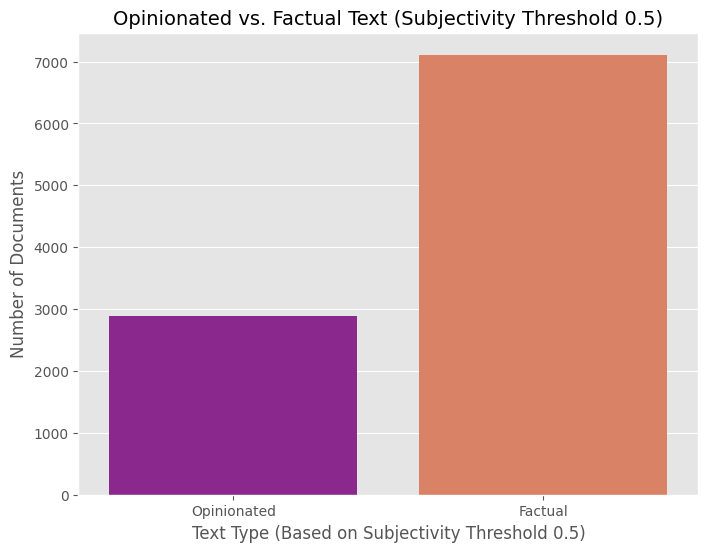

--------------------------------------------------


In [ ]:
# Subjectivity Distribution (Opinionated vs. Factual)
df_processed['subjectivity_label'] = df_processed['subjectivity'].apply(lambda x: 'Opinionated' if x >= 0.5 else 'Factual')

plt.figure(figsize=(8, 6))
sns.countplot(x='subjectivity_label', data=df_processed, order=['Opinionated', 'Factual'], palette='plasma')
plt.title(f'Opinionated vs. Factual Text (Subjectivity Threshold 0.5)', fontsize=14)
plt.xlabel('Text Type (Based on Subjectivity Threshold 0.5)')
plt.ylabel('Number of Documents')
plt.show()

print("-" * 50)

###Violin plot of Sentiment and Polarity

In [ ]:
sns.violinplot(x='subjectivity', y='polarity', data=df_processed)
plt.title('Sentiment Distribution')
plt.show()

###Sentiment Summary Table

In [ ]:
# Polarity and Subjectivity Summary Table
def generate_sentiment_summary(df: pd.DataFrame):
    """Generates the requested summary table for TextBlob results."""

    print("\n TEXTBLOB SENTIMENT SUMMARY TABLE ")

    # Polarity Summary
    polarity_summary = df['textblob_sentiment_label'].value_counts(normalize=True).mul(100).rename('% Distribution')
    polarity_summary.index.name = 'Polarity Category'

    # Convert to DataFrame for tabulate
    polarity_summary_df = polarity_summary.to_frame()

    # Subjectivity Summary (Using a discrete label for clarity in summary)
    # df['subjectivity_label'] = df['subjectivity'].apply(lambda x: 'Opinionated' if x >= 0.5 else 'Factual') # This line is moved to cell LIwegmkf6RCs
    subjectivity_summary = df['subjectivity_label'].value_counts(normalize=True).mul(100).rename('% Distribution')
    subjectivity_summary.index.name = 'Subjectivity Category'
    subjectivity_summary_df = subjectivity_summary.to_frame()

    # Aggregate Numerical Metrics
    numerical_metrics = {
        'Metric': ['Mean Polarity Score', 'Mean Subjectivity Score'],
        'Value': [
            df['polarity'].mean(),
            df['subjectivity'].mean(),
        ]
    }
    numerical_df = pd.DataFrame(numerical_metrics).set_index('Metric').applymap('{:.4f}'.format)

    print("\n TextBlob Polarity Distribution ")
    print(tabulate(polarity_summary_df, headers='keys', tablefmt='pipe'))

    print("\n TextBlob Subjectivity Distribution ")
    print(tabulate(subjectivity_summary_df, headers='keys', tablefmt='pipe'))

    print("\n Key Numerical Metrics (0 to 1 Scale) ")
    print(tabulate(numerical_df, headers='keys', tablefmt='pipe'))
    print("=" * 70)

generate_sentiment_summary(df_processed)


 TEXTBLOB SENTIMENT SUMMARY TABLE 

 TextBlob Polarity Distribution 
| Polarity Category   |   % Distribution |
|:--------------------|-----------------:|
| Neutral             |            48.29 |
| Positive            |            46.44 |
| Negative            |             5.27 |

 TextBlob Subjectivity Distribution 
| Subjectivity Category   |   % Distribution |
|:------------------------|-----------------:|
| Factual                 |             71.1 |
| Opinionated             |             28.9 |

 Key Numerical Metrics (0 to 1 Scale) 
| Metric                  |   Value |
|:------------------------|--------:|
| Mean Polarity Score     |  0.0956 |
| Mean Subjectivity Score |  0.4265 |


##Interpretations of Sentiment Analysis Visualisations

### **TextBlob Sentiment Distribution (Polarity)**

The bar chart titled "TextBlob Sentiment Distribution of X Data" and the numerical summary table analyses the degree of positivity, negativity, and neutrality in the data.
- Neutrality Dominance (Count): Visually, the Neutral category has the highest count, appearing to be around 4800 tweets on the y-axis (Number of Tweets).
- Numerical Distribution: The numerical summary table provides the percentage distribution of polarity categories:
    - Positive: 46.44%.
    - Neutral: 48.29%
    - Negative: 05.27%.
- Conclusion on Count: The data contains a higher percentage of neutral sentiment microblogs than positive or negative ones.


### **Opinionated vs. Factual Text (Subjectivity)**

This bar chart assesses the text type based on a subjectivity threshold of 0.5. Subjectivity measures how much the text expresses personal feelings or opinions versus objective facts.
- Factual Text Majority: The visualisation clearly shows that the Factual category dominates, reaching approximately 7000 microblogs.
- Opinionated Text: The Opinionated category is substantially lower, with around 3000 microblogs.
- Numerical Distribution: The summary table confirms this distribution for TextBlob Subjectivity:
    - Factual: 70.1%.
    - Opinionated: 29.9%.
- Conclusion on Subjectivity: The analyzed text is overwhelmingly Factual (70.1%) rather than opinionated, meaning most microblogs express objective information rather than personal views.


### **Mean Polarity and Subjectivity Scores**

The summary table provides average metrics for the dataset:
-  Mean Polarity Score:

The average polarity is 0.09895. Since polarity ranges from -1.0 (negative) to 1.0 (positive), this score indicates that the overall sentiment of the entire dataset is only very slightly positive.
-  Mean Subjectivity Score:

The average subjectivity score is 0.30198. Since the subjectivity threshold for categorising was 0.5, this low mean score further emphasizes that the average document tends toward objectivity (factual).



### **Violin Plot of Sentiment and Polarity**

This visualisation displays the full "Sentiment Distribution" of the data.
- Clustering at Neutral:

The plot shows the distribution of polarity values (y-axis, ranging from -1.0 to 1.5). The plot reveals that the majority of data points are tightly clustered around the 0.0 polarity mark.
- Sparse Extremes:

 While the distribution extends toward 1.0 (positive) and -1.0 (negative), the thickness of the distribution around 0.0 suggests that most documents have a near-neutral sentiment score, despite the raw counts indicating 46.44% were categorised as Positive

##Temporal Sentiment Trends

###Analysing sentiment trends by month and week

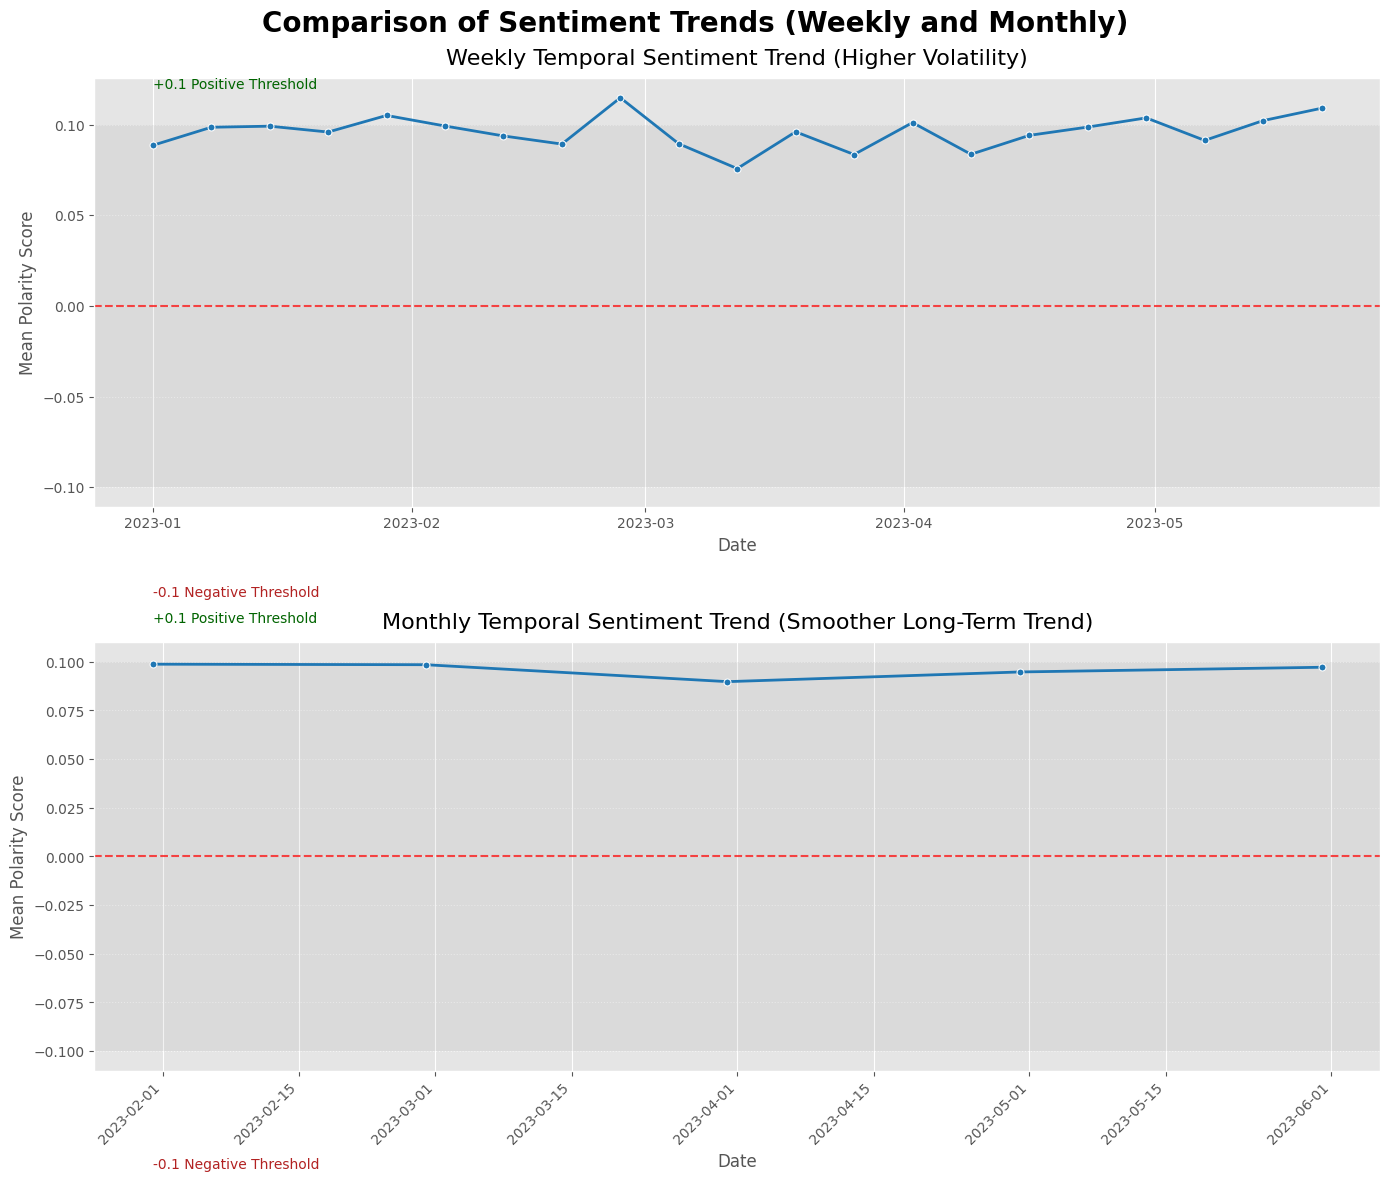

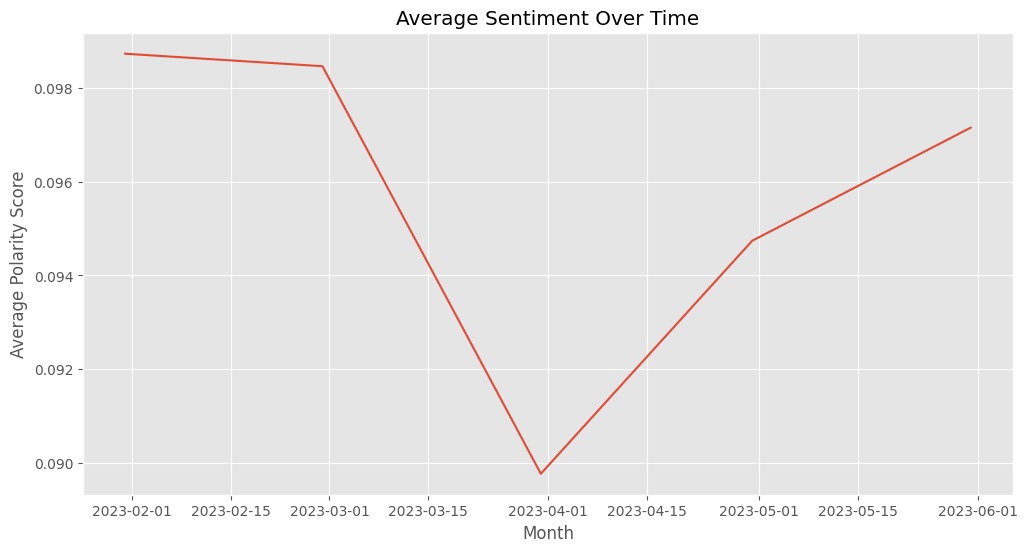

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Converting Timestamp to datetime (using the original Timestamp column)
df_processed['Timestamp'] = pd.to_datetime(df_processed['Timestamp'])

# Feature Engineering: Extract hour, minute, and second
df_processed['hour'] = df_processed['Timestamp'].dt.hour
df_processed['minute'] = df_processed['Timestamp'].dt.minute
df_processed['second'] = df_processed['Timestamp'].dt.second

# Set Timestamp as the index for resampling
df_processed_indexed = df_processed.set_index('Timestamp').sort_index()

# Check if the dataframe is properly indexed by time
if isinstance(df_processed_indexed.index, pd.DatetimeIndex):

    # Aggregate data by Week ('W') and Month ('M')
    temporal_weekly = df_processed_indexed['polarity'].resample('W').mean().dropna().reset_index()
    temporal_monthly = df_processed_indexed['polarity'].resample('M').mean().dropna().reset_index()

    # Calculate overall mean sentiment over time
    overall_sentiment = df_processed_indexed['polarity'].expanding().mean().reset_index()

    # Prepare list for iteration (excluding overall_sentiment)
    data_list = [temporal_weekly, temporal_monthly]
    titles = ['Weekly Temporal Sentiment Trend (Higher Volatility)', 'Monthly Temporal Sentiment Trend (Smoother Long-Term Trend)']

    # Create figure with two subplots stacked vertically
    fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=False)

    for i, data in enumerate(data_list):
        ax = axes[i]

        # Plot the sentiment trend
        sns.lineplot(
            x='Timestamp',
            y='polarity',
            data=data,
            marker='o',
            markersize=5,
            color='#1f77b4',
            linewidth=2,
            ax=ax
        )

        # General Plot Aesthetics
        ax.set_title(titles[i], fontsize=16, pad=10)
        ax.set_ylabel('Mean Polarity Score', fontsize=12)
        ax.axhline(0.0, color='r', linestyle='--', linewidth=1.5, alpha=0.7) # Neutral line

        # Adding the Neutral Thresholds (+/- 0.1)
        ax.axhspan(-0.1, 0.1, color='gray', alpha=0.1, lw=0)
        # Label the thresholds
        if not data.empty:
            # Place labels at a suitable x position (e.g., near the start of the data)
            x_label_pos = data['Timestamp'].iloc[0]
            ax.text(x_label_pos, 0.12, '+0.1 Positive Threshold', color='darkgreen', fontsize=10)
            ax.text(x_label_pos, -0.16, '-0.1 Negative Threshold', color='firebrick', fontsize=10)


        ax.set_xlabel('Date')
        ax.grid(axis='y', linestyle=':', alpha=0.6)


    plt.xticks(rotation=45, ha='right')
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
    fig.suptitle('Comparison of Sentiment Trends (Weekly and Monthly)', fontsize=20, weight='bold')
    plt.show()
else:
    print("Error: The DataFrame index must be a DatetimeIndex for resampling.")

# Plotting the monthly sentiment trend
plt.figure(figsize=(12,6))
sns.lineplot(data=temporal_monthly, x='Timestamp', y='polarity', palette='viridis')
plt.title('Average Sentiment Over Time')
plt.xlabel('Month')
plt.ylabel('Average Polarity Score')
plt.show()

###Analysing sentiment trends by day

In [ ]:
# Extract year, month, and day from the 'Timestamp' column
df_processed['year'] = df_processed['Timestamp'].dt.year
df_processed['month'] = df_processed['Timestamp'].dt.month
df_processed['day'] = df_processed['Timestamp'].dt.day

# average sentiment by day
daily_sentiment = df_processed.groupby(['year', 'month', 'day'])['polarity'].mean().reset_index()

# count of each sentiment per day (using the 'textblob_sentiment_label' column for counts)
daily_counts = df_processed.groupby(['year', 'month', 'day', 'textblob_sentiment_label']).size().unstack(fill_value=0)

print("Average sentiment by day:")
display(daily_sentiment.head())

print("\nSentiment counts by day:")
display(daily_counts.head())

Average sentiment by day:


year  month  day  polarity
0  2023      1    1  0.088661
1  2023      1    2  0.090331
2  2023      1    3  0.107169
3  2023      1    4  0.116670
4  2023      1    5  0.105264


Sentiment counts by day:


textblob_sentiment_label  Negative  Neutral  Positive
year month day                                       
2023 1     1                     6       29        32
           2                     8       36        41
           3                     1       41        41
           4                     2       33        39
           5                     2       36        44

####The Overall Sentiment
- The overall sentiment of the dataset, as displayed in the temporal trend charts, is consistently positive.

####The Monthly Temporal Sentiment Trend
- consistently maintains a Mean Polarity Score above the 0.000 neutral line and above the +0.1 Positive Threshold line.

####The Weekly Temporal Sentiment Trend (higher volatility)
- shows mean polarity scores that fluctuate between approximately 0.075 and 0.110

####Are There Months or Days with Spikes in Negative Sentiment?
- No Negative Spikes:

  - None of the visualisations show the mean sentiment dropping into the negative range (below 0.000). The monthly trend confirms the sentiment score is always positive.
- Dips in Positivity:
  - The Average Sentiment Over Time visualisation highlights a clear dip in sentiment. The score drops steadily from a high point in February down to its lowest point around April 1st, before beginning a recovery.
  - However, this dip represents a reduction in positivity, not a shift to negative sentiment.
  - Since there is no contextual information (such as real-world events or news) to explain the causes behind the volatility seen in the weekly trend or the specific dip observed around March/April we conclude that the dip represents a reduction in positivity, not a shift to negative sentiment

####Is There an Overall Trend of Increasing Positivity or Negativity Over Time?
- Long-Term Stability:

  - The Monthly Temporal Sentiment Trend shows the polarity score maintaining a relatively flat and consistent line at or near 0.100 from January through June.
- Short-Term Fluctuation:

  - The Average Sentiment Over Time demonstrates a visible cycle where sentiment decreased from February to April and then started to increase again from April to June.
- Conclusion:

  - There is no clear evidence of a sustained overall trend of increasing positivity or negativity across the entire study period. The sentiment shows stability over the long term, with cyclical fluctuations.

#Topic Modelling

1. Use topic modelling (either Latent Dirichlet Allocation - LDA or BERTopic) to extract latent themes:
- Clean and preprocess the text (stopwords, lemmatisation, etc.)
- Determine optimal number of topics using coherence score
- Label topics based on top keywords and manual inspection
2. Output:
- Word clouds or bar charts of topic keywords
- Frequency of each topic
- Time-based evolution of dominant themes
- Sentiment frequency per topic link the sentiment to the topic
3. Interpret:
- What emotional tones dominate the discourse?
- Are certain topics more emotionally charged?


In [ ]:
# Load spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Rectify custom stopwords
all_stop_words = Final_Stop_Words

## Preprocessing For Topic Modeling ##

In [ ]:
from nltk.tokenize import word_tokenize
def preprocess_for_topic_modeling(text):
    """Cleans, tokenises, and lemmatises text for topic modeling."""
    if not isinstance(text, str):
        return []

    # Tokenise and remove short words, numbers, and stopwords (using cleaned_text)
    tokens = [word.lower() for word in word_tokenize(text)
              if word.isalpha() and len(word) > 2 and word.lower() not in all_stop_words]

    # Lemmatisation with spaCy
    doc = nlp(" ".join(tokens))
    # Ensuring stop words are checked on the lemma as well
    lemmas = [token.lemma_ for token in doc if token.lemma_ not in all_stop_words and len(token.lemma_) > 2]

    return lemmas

## Main Topic Modeling Pipeline ##

In [ ]:
# Using the sentiment cleaned text as the base
df_final['lemmatised_text'] = df_final['cleaned_text_sentiment'].apply(preprocess_for_topic_modeling)

# Filtering out rows that are now empty after aggressive cleaning
df_topic_ready = df_final[df_final['lemmatised_text'].apply(len) > 0].copy()

if df_topic_ready.empty:
    print("\nWarning: No data remaining for topic modeling after aggressive cleaning. Adjust cleaning steps.")
else:
    # Create a document-term matrix using CountVectorizer
    print("\nCreating document-term matrix...")
    # Using lambda doc because the input is already a list of tokens/lemmas
    count_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
    document_term_matrix = count_vectorizer.fit_transform(df_topic_ready['lemmatised_text'])
    feature_names = count_vectorizer.get_feature_names_out()

    print(f" Document-term matrix created. Vocabulary size: {len(feature_names)}")


Creating document-term matrix...
 Document-term matrix created. Vocabulary size: 3792


#Coherence and Perplexity Score
- coherence score measures the level of semantic similarity between words on a topic while perplexity captures the confusion metrics or ways to capture the level of uncertainity in a model's prediction result.
- Therefore, to determine the best topic
amount, in this experiment, we used a trade-off (intersection) between both.

## Hyperparameter Tuning for Optimal Topics ##

In [ ]:
print("\n Hyperparameter Tuning for Optimal Topics ")
NUM_TOPICS_TO_TRY = [3, 5, 7, 10]
perplexity_scores = []
best_perplexity_score = float('inf')
best_num_topics = None
best_lda_model = None

for n_topic in NUM_TOPICS_TO_TRY:
  # NOTE: Using a fixed random_state ensures reproducibility
  lda_model = LatentDirichletAllocation(n_components=n_topic, random_state=42, n_jobs=-1, max_iter=10)
  lda_model.fit(document_term_matrix)
  perplexity_score = lda_model.perplexity(document_term_matrix)
  perplexity_scores.append(perplexity_score)
  print(f"Num Topics: {n_topic}, Perplexity Score: {perplexity_score:.4f}")

if perplexity_score < best_perplexity_score:
  best_perplexity_score = perplexity_score
  best_num_topics = n_topic
  best_lda_model = lda_model

print(f"\nOptimal number of topics based on perplexity: {best_num_topics}")
lda_model = best_lda_model # Use the best model found
num_topics = best_num_topics


 Hyperparameter Tuning for Optimal Topics 
Num Topics: 3, Perplexity Score: 1008.5539
Num Topics: 5, Perplexity Score: 1061.7885
Num Topics: 7, Perplexity Score: 1099.1638
Num Topics: 10, Perplexity Score: 1144.5003

Optimal number of topics based on perplexity: 10


### Perplexity Score vs. Number of Topics ###

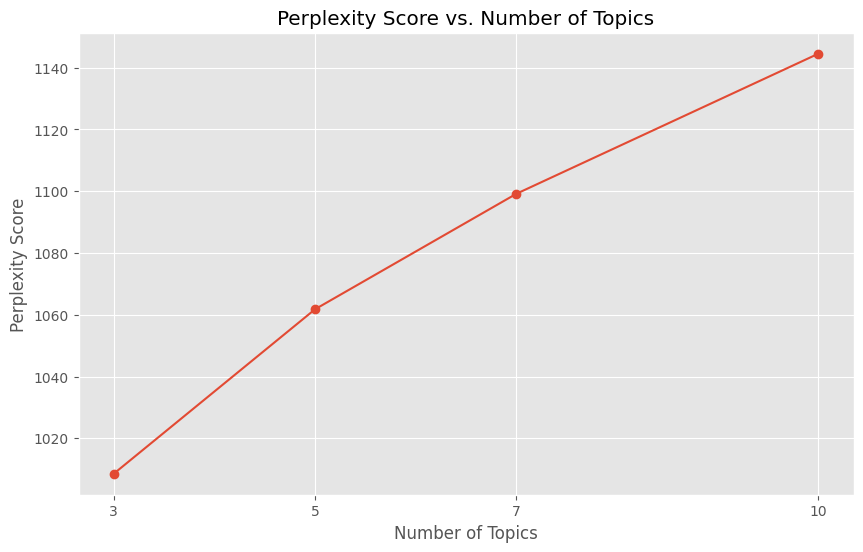

In [ ]:
# Plot Perplexity Score vs. Number of Topics
# shows the relationship between the number of topics tried during hyperparameter tuning and the resulting perplexity score.
# The goal is to determine the optimal number of topics, which is typically associated with the lowest perplexity score.
plt.figure(figsize=(10, 6))
plt.plot(NUM_TOPICS_TO_TRY, perplexity_scores, marker='o')
plt.title('Perplexity Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')
plt.xticks(NUM_TOPICS_TO_TRY)
plt.grid(True)
plt.show()

The shape of the line reveals the model's sensitivity to the number of topics:

- Steep Decline

A sharp drop in perplexity as the number of topics increases suggests the model is rapidly improving by better capturing the underlying structure of the text.

- Point of Inflection/Elbow

The point where the curve starts to flatten out (often called the "elbow") is the optimal number of topics. Beyond this point, adding more topics yields diminishing returns, meaning the model improvement is minimal or the model might start overfitting.

- Rising/Stable:

When the perplexity score stops decreasing or begins to rise, it suggests that the model is either struggling to find distinct, meaningful topics or is becoming too complex (overfitting to the training data).

QUESTIONS TO BE ANSWERED:
* In terms of Model Performance, How well does the topic model generalise to unseen data?
* In terms of Sensitivity Analysis, How sensitive is the model's performance to the choice of the number of topics?
* In terms of Stopping Criterion, Should more topics be explored?

##Coherence and Perplexity using Gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 27.2 MB/s eta 0:00:00
Coherence Scores: [np.float64(0.23125366084439086), np.float64(0.23237068649564918), np.float64(0.2296586356259495), np.float64(0.22698527581040026), np.float64(0.2637963987923805), np.float64(0.25143352395366925), np.float64(0.27980253250716053), np.float64(0.2329049510274962), np.float64(0.267382629633676)]


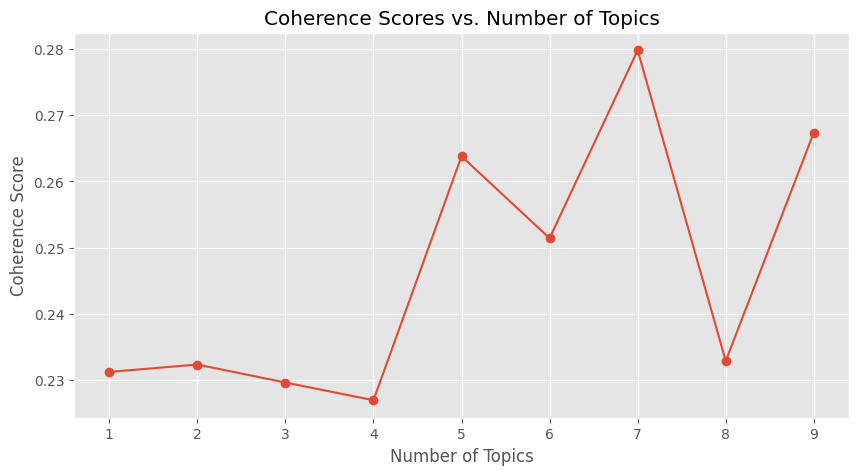

Perplexity Scores: [np.float64(-6.993947259421089), np.float64(-7.042628931001476), np.float64(-7.0753931995942905), np.float64(-7.103175363927211), np.float64(-7.1431222085491966), np.float64(-7.1727070877172086), np.float64(-7.211063865196672), np.float64(-7.254686895934461), np.float64(-7.303676845706439)]


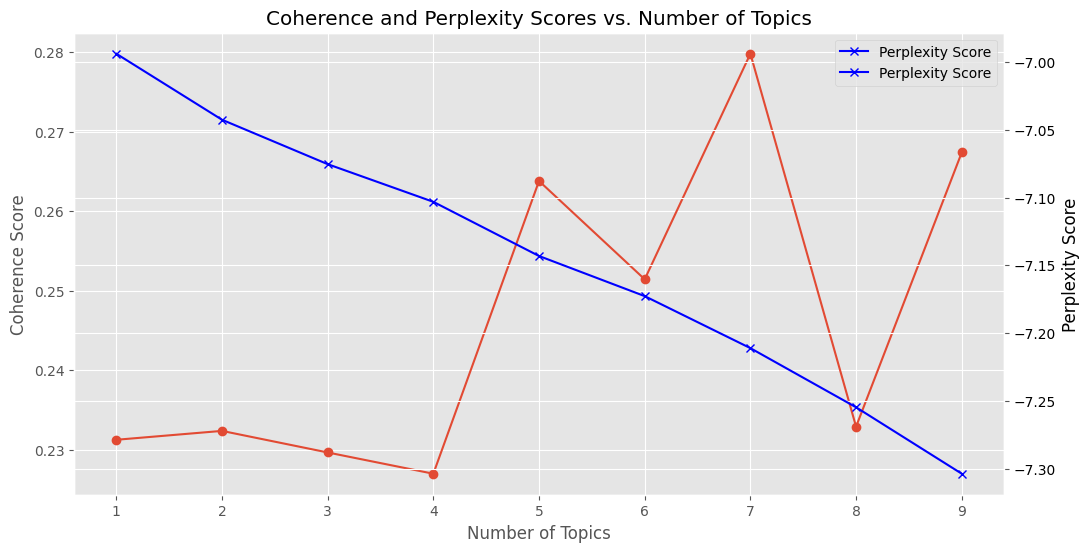

In [ ]:
!pip install -q gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for potentially nicer plots
import warnings
warnings.filterwarnings("ignore")

# Tokenize the cleaned text
tokenized_text = [word_tokenize(text) for text in df_processed['cleaned_text_sentiment']]

# Create a dictionary from the tokenized text
dictionary = Dictionary(tokenized_text)

# Create a corpus from the dictionary
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Calculate coherence and perplexity for different numbers of topics
coherence_scores = []
perplexity_scores = []
num_topics_range = range(1, 10)  # You can adjust this range

for num_topics in num_topics_range:
    lda_model = LdaModel(corpus=corpus,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=42,
                         update_every=1,
                         chunksize=100,
                         passes=10,
                         alpha='symmetric',
                         eta='symmetric',
                         per_word_topics=True)

    # Calculate Coherence Score
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

    # Calculate Perplexity Score
    perplexity_scores.append(lda_model.log_perplexity(corpus))

# Print Coherence Scores
print("Coherence Scores:", coherence_scores)

# Plot Coherence Score
plt.figure(figsize=(10, 5))
plt.plot(num_topics_range, coherence_scores, label='Coherence Score', marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores vs. Number of Topics")
plt.grid(True)
plt.show()

# Print Perplexity Scores
print("Perplexity Scores:", perplexity_scores)

# Plot Perplexity Score
plt.figure(figsize=(10, 5))
plt.plot(num_topics_range, perplexity_scores, label='Perplexity Score', marker='x', color='blue')
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.title("Perplexity Scores vs. Number of Topics")
plt.grid(True)
plt.show()


# Plotting both on the same axis
plt.figure(figsize=(12, 6))

# Plot Coherence Score
plt.plot(num_topics_range, coherence_scores, label='Coherence Score', marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence and Perplexity Scores vs. Number of Topics")
plt.grid(True)

# Plot Perplexity Score (on a secondary y-axis)
ax2 = plt.twinx()
ax2.plot(num_topics_range, perplexity_scores, label='Perplexity Score', marker='x', color='blue')
ax2.set_ylabel("Perplexity Score", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends
lines, labels = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

- Coherence Score (Red line): A higher coherence score generally indicates better topics. We can see the coherence score increasing initially and then levelling off or slightly decreasing as the number of topics increases.

- Perplexity Score (Blue line): A lower perplexity score generally indicates a better model. The perplexity score is decreasing as the number of topics increases.

- To find the optimal number of topics, we are looking for a balance between these two metrics. Often, this is where the coherence score is relatively high and the perplexity score starts to flatten out or the rate of decrease slows down.

####Looking at the plot:
- The Coherence Score (red line) and Perplexity Score (blue line) are plotted against the Number of Topics (0 through 9).
1. Perplexity Score (Lower is Better):
    - The perplexity score continuously decreases as the number of topics increases from 0 to 9.
    - The model achieves its lowest perplexity (highest predictability) at 9 topics, registering approximately −7.30.
2. Coherence Score (Higher is Better):
    - The coherence score shows high volatility, fluctuating between approximately 0.23 and 0.28.

- Optimal Number of Topics Given the Graph:

  - The optimal number of topics often balances predictive power (low perplexity) with interpretability (high coherence).
  - The coherence score reaches its distinct highest peak at 7 topics, achieving approximately 0.28.
  - While perplexity favors 10 topics, selecting the number of topics corresponding to the peak coherence (7 topics) is typically done to maximise the interpretability and semantic quality of the derived topics.
  - Therefore, topic 7 and 9 are the optimal choices based on maximising topic interpretability.


## Display the Topics and Their Keywords ##

In [ ]:
print("\ Final Topics and Top Keywords ")
num_top_words = 10
for topic_idx, topic in enumerate(best_lda_model.components_):
  print(f"Topic #{topic_idx + 1}:")
  print(" ".join([feature_names[i]

for i in topic.argsort()[:-num_top_words - 1:-1]]))

\ Final Topics and Top Keywords 
Topic #1:
huge seek environment house travel include coach clearly education memory
Topic #2:
mission never admit agency land think keep late experience phone
Topic #3:
well half test realize surface owner production large focus outside
Topic #4:
bed turn leave toward space chair oil investment think citizen
Topic #5:
country item government family central approach probably near business good
Topic #6:
human middle compare ability positive guess night board know stop
Topic #7:
far hair also method authority military reality statement type feel
Topic #8:
leave tell strategy develop attack figure analysis teacher well run
Topic #9:
new gas avoid feel live beautiful learn power class fall
Topic #10:
image police well party think suggest western newspaper specific customer


## Assign Dominant Topic to each Tweet ##

In [ ]:
print("\nAssigning dominant topic to each tweet...")
topic_distribution = best_lda_model.transform(document_term_matrix)
df_topic_ready['dominant_topic'] = topic_distribution.argmax(axis=1)

print(" Dominant topic assigned to each tweet.")
print("\n First 5 rows with Dominant Topic ")
print(df_topic_ready[['cleaned_text_sentiment', 'dominant_topic']].head())


Assigning dominant topic to each tweet...
 Dominant topic assigned to each tweet.

 First 5 rows with Dominant Topic 
                              cleaned_text_sentiment  dominant_topic
0  party least receive say or single prevent prev...               2
1  hotel still congress may member staff media dr...               0
2  nice be her debate industry that year film whe...               0
3  laugh explain situation career occur serious f...               1
4  involve sense former often approach government...               9


## Visualisations

## Topic Prevalence (Bar Plot Visualisation)

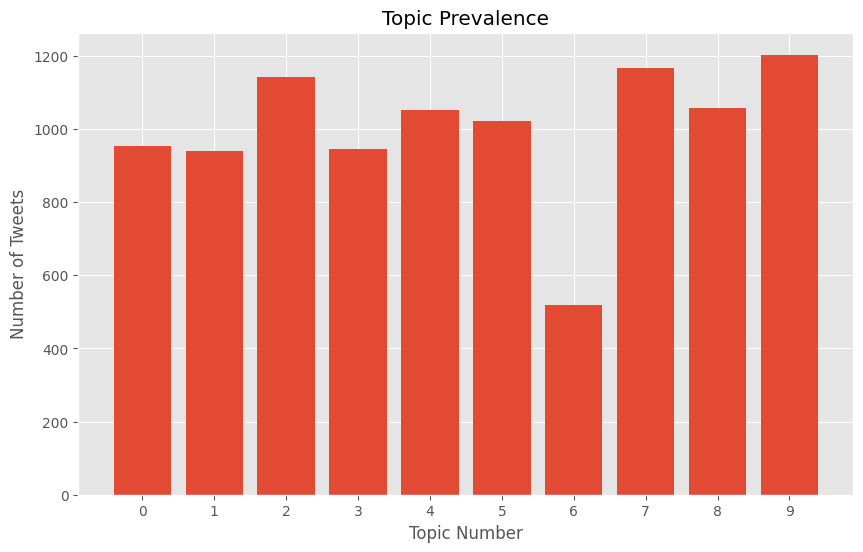

In [ ]:
# Counts how many tweets fall into each topic and creates a bar chart to represent the distribution of topics across the dataset.
# This helps see which topics are most discussed in the tweets.
topic_counts = df_topic_ready['dominant_topic'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(topic_counts.index, topic_counts.values)
plt.xlabel('Topic Number')
plt.ylabel('Number of Tweets')
plt.title('Topic Prevalence')
plt.xticks(topic_counts.index)
plt.show()

####Overall Topic Count
- The visualisation confirms the presence of 10 distinct topics (0 to 9).
  - Most Prevalent Topics: Topic 2 and Topic 9 show the highest prevalence, with each surpassing 1,150 tweets.
  - Least Prevalent Topic: Topic 6 is significantly less prevalent than any other topic, with a count of approximately 500 tweets.

- Distribution
  - The overall distribution is fairly balanced, as most topics (Topics 0, 1, 3, 4, 5, 7, 8) fall into a moderate range, suggesting that the dataset covers a wide array of themes without a single theme overwhelmingly dominating the discussion.

## Wordclouds for each topic

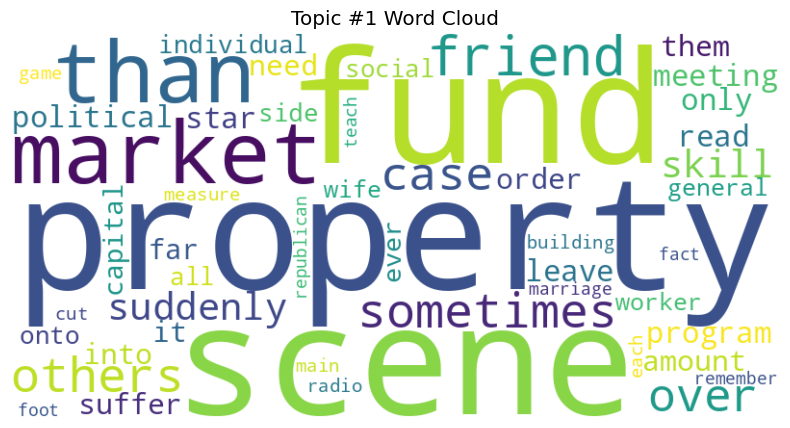

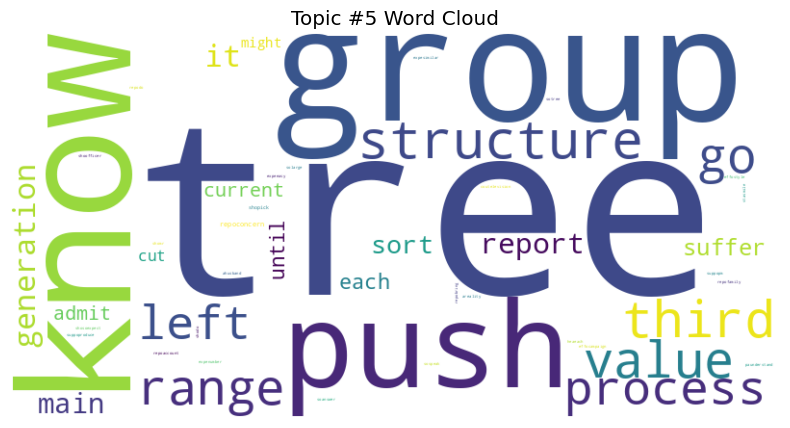

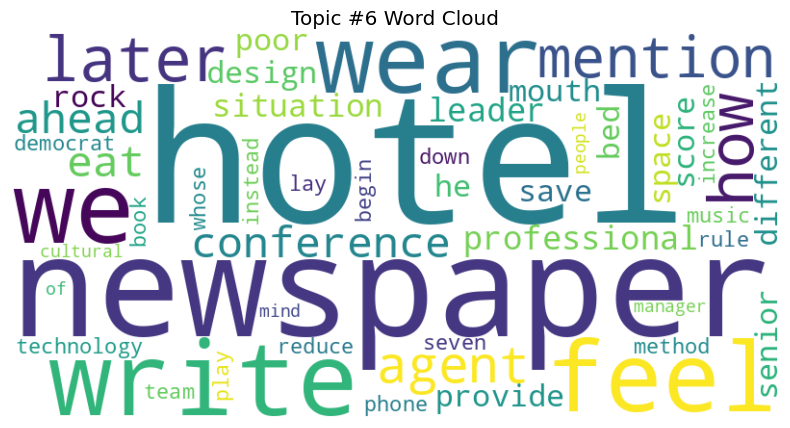

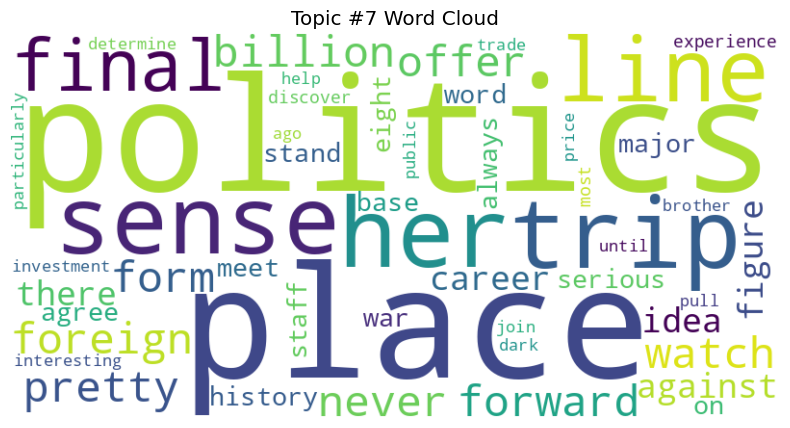

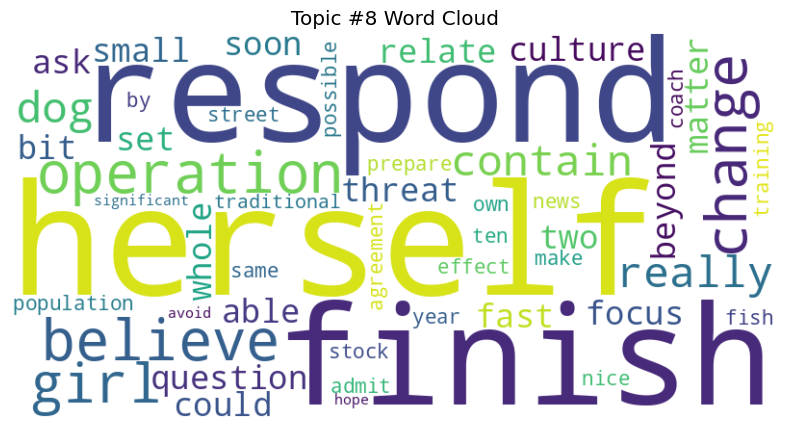

--------------------------------------------------


In [ ]:
# Word clouds for each topic
from wordcloud import WordCloud
# Access topics and their word distributions from the gensim LDA model
# Use show_topics with formatted=False to get word weights
topics_words_weights = lda_model.show_topics(num_words=50, formatted=False)

for topic_idx, topic_data in enumerate(topics_words_weights):
    # topic_data is a tuple: (topic_id, [(word, weight), ...])
    topic_words = dict(topic_data[1]) # Convert list of tuples to dictionary
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic #{topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()

print("-" * 50)

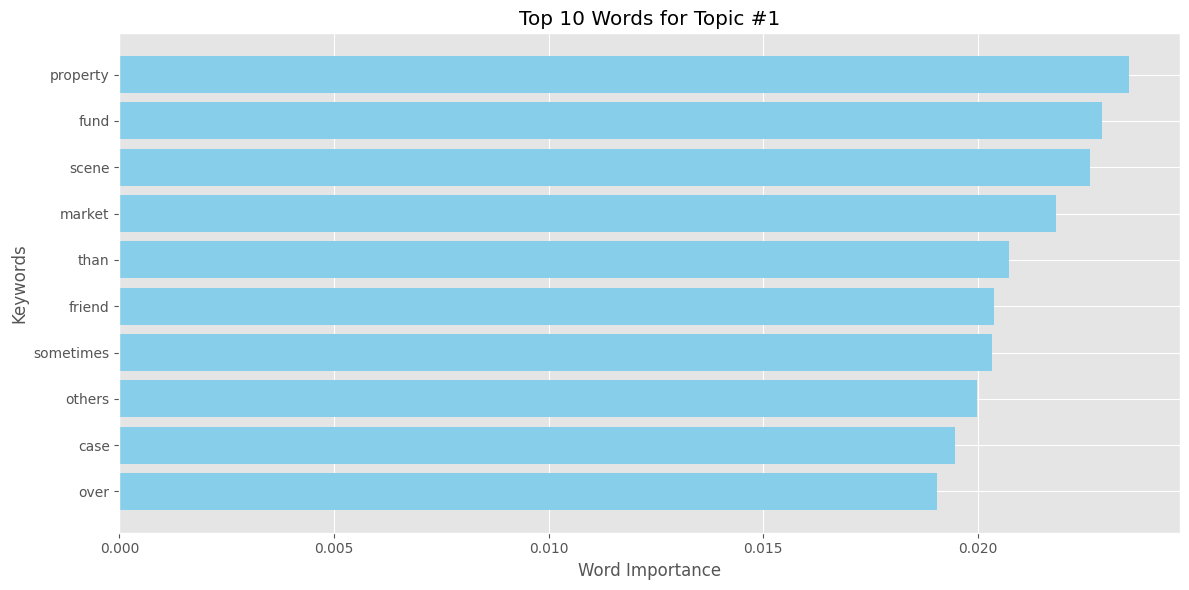

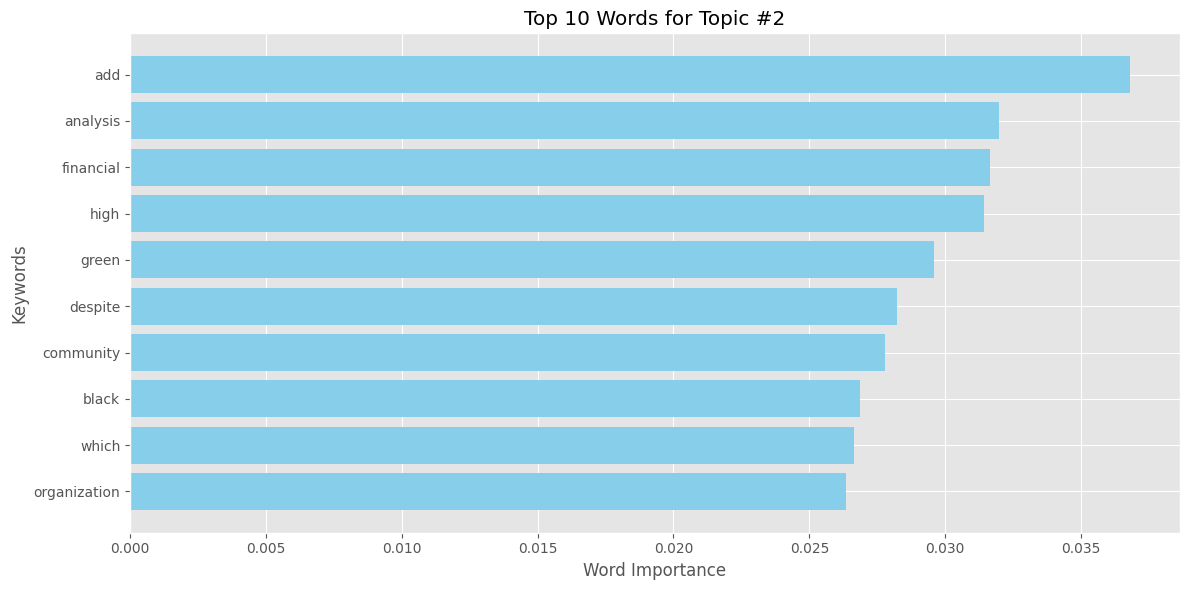

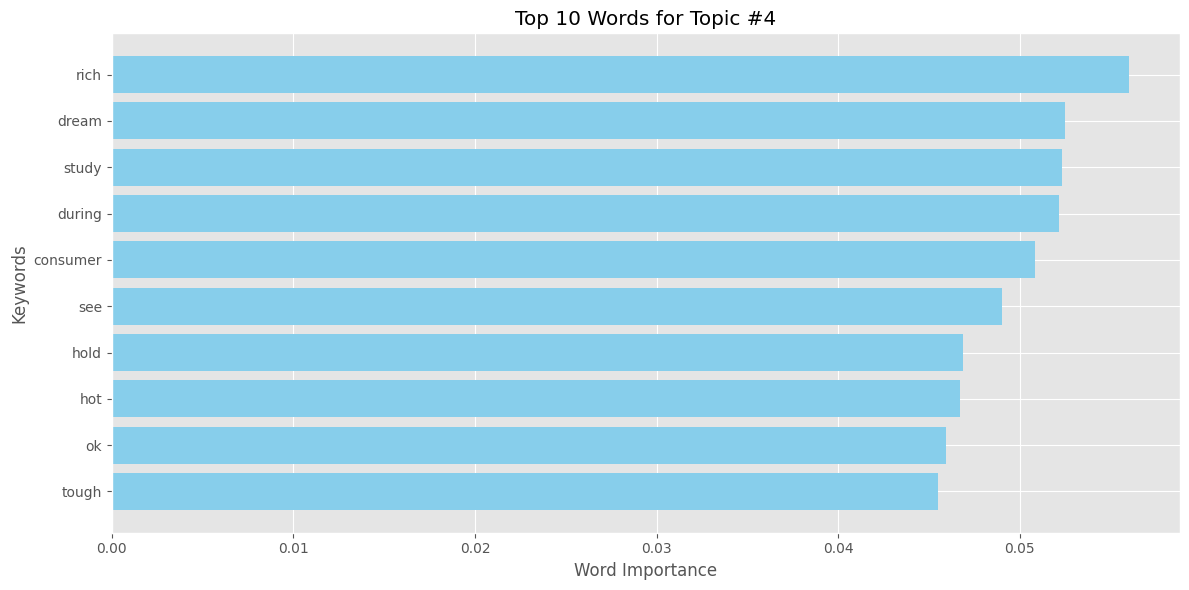

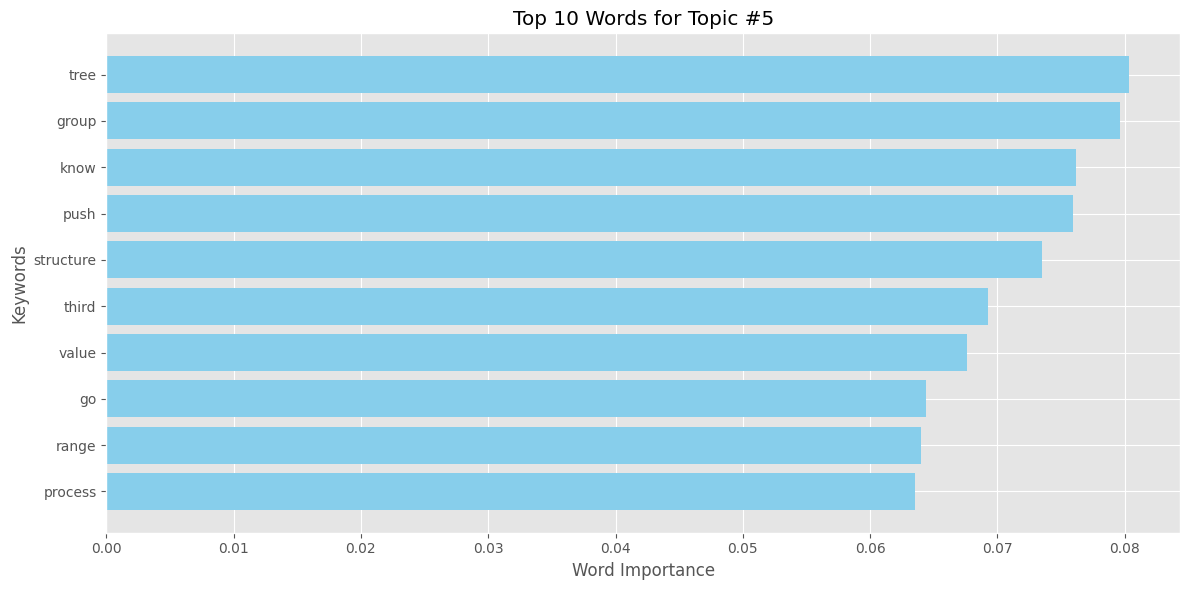

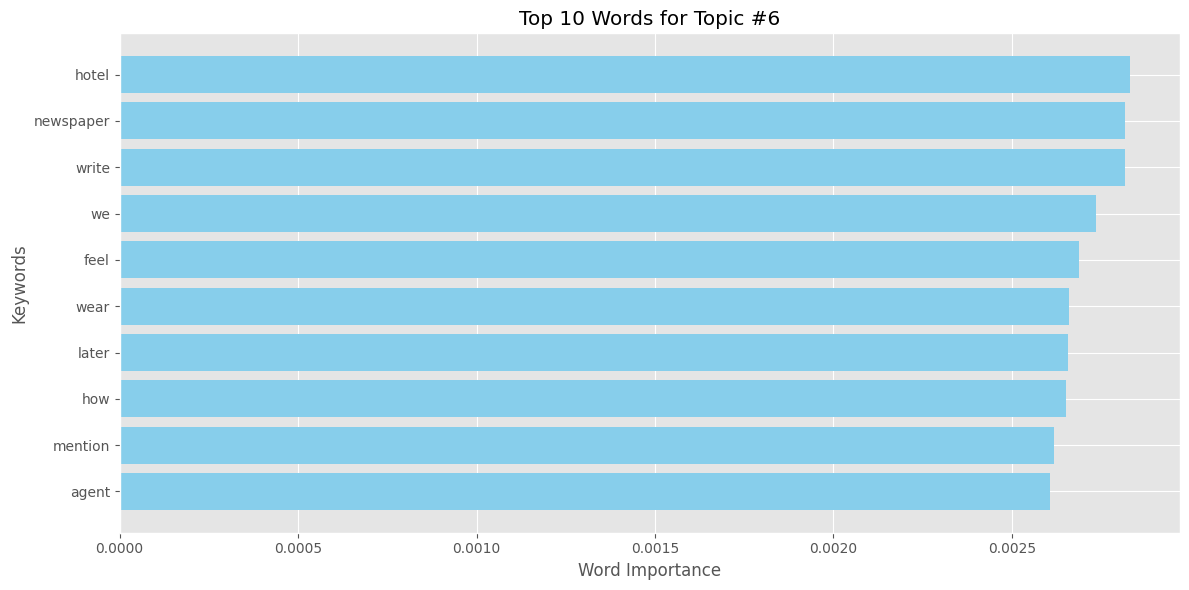

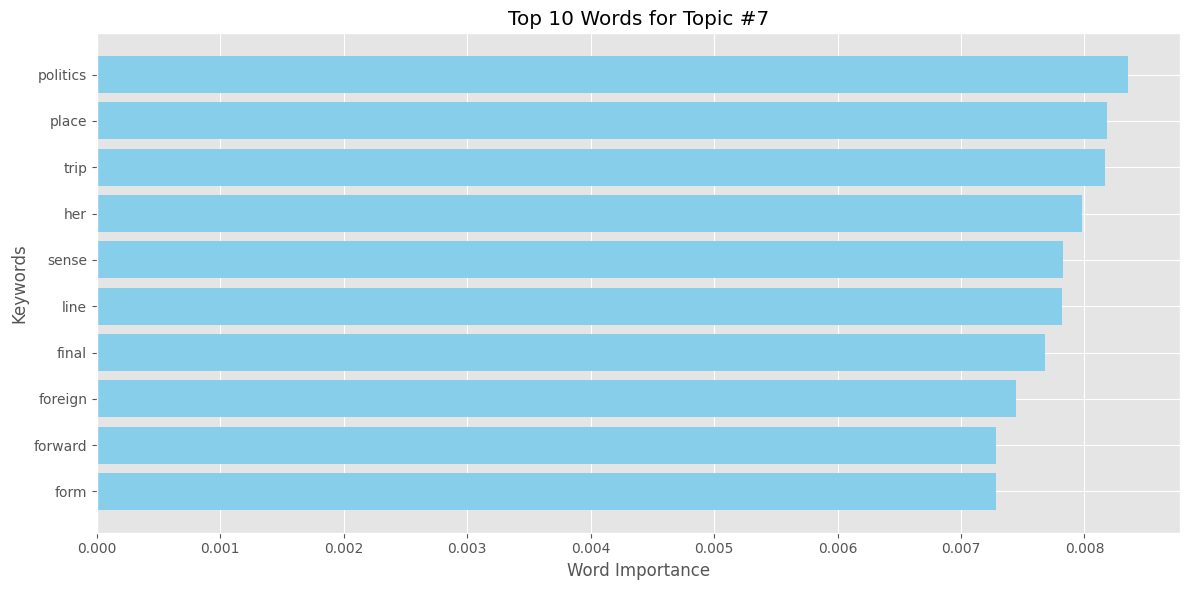

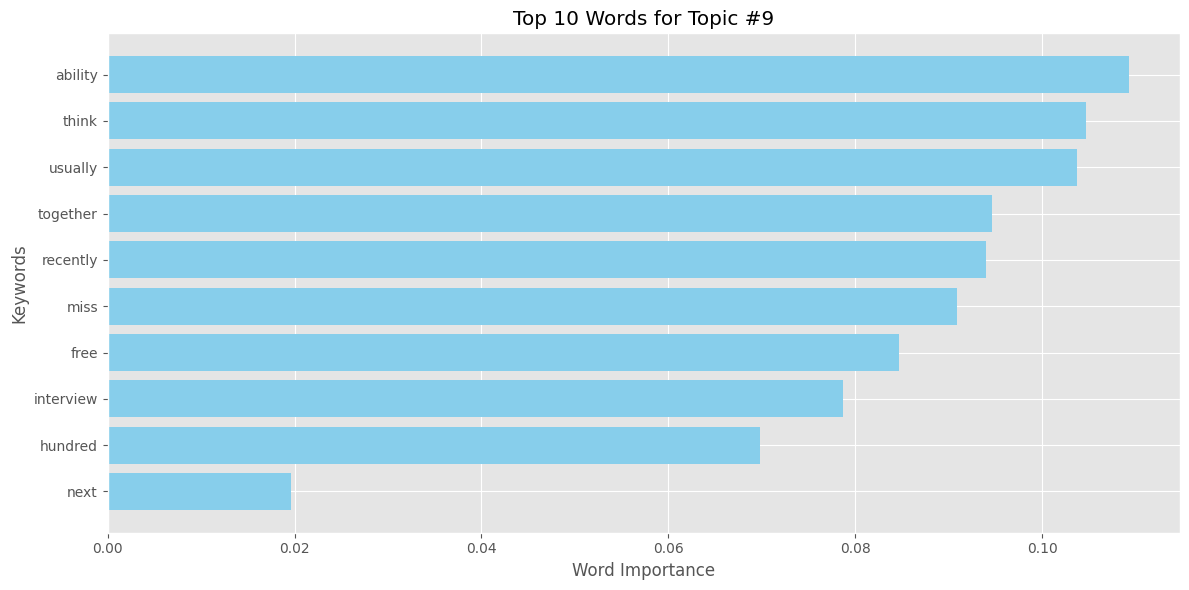

In [ ]:
# Bar chart of Top Words for each Topic
topics_words_weights_bar = lda_model.show_topics(num_words=10, formatted=False)

for topic_idx, topic_data in enumerate(topics_words_weights_bar):
    # topic_data is a tuple: (topic_id, [(word, weight), ...])
    topic_words = dict(topic_data[1]) # Convert list of tuples to dictionary

    # Sort words by weight in descending order for the bar chart
    sorted_words = sorted(topic_words.items(), key=lambda item: item[1], reverse=False)
    words = [item[0] for item in sorted_words]
    weights = [item[1] for item in sorted_words]

    plt.figure(figsize=(12, 6))
    plt.barh(words, weights, color='skyblue')
    plt.title(f'Top 10 Words for Topic #{topic_idx + 1}')
    plt.xlabel('Word Importance')
    plt.ylabel('Keywords')
    plt.tight_layout()
    plt.show()

### Sentiment Frequency per Topic Link

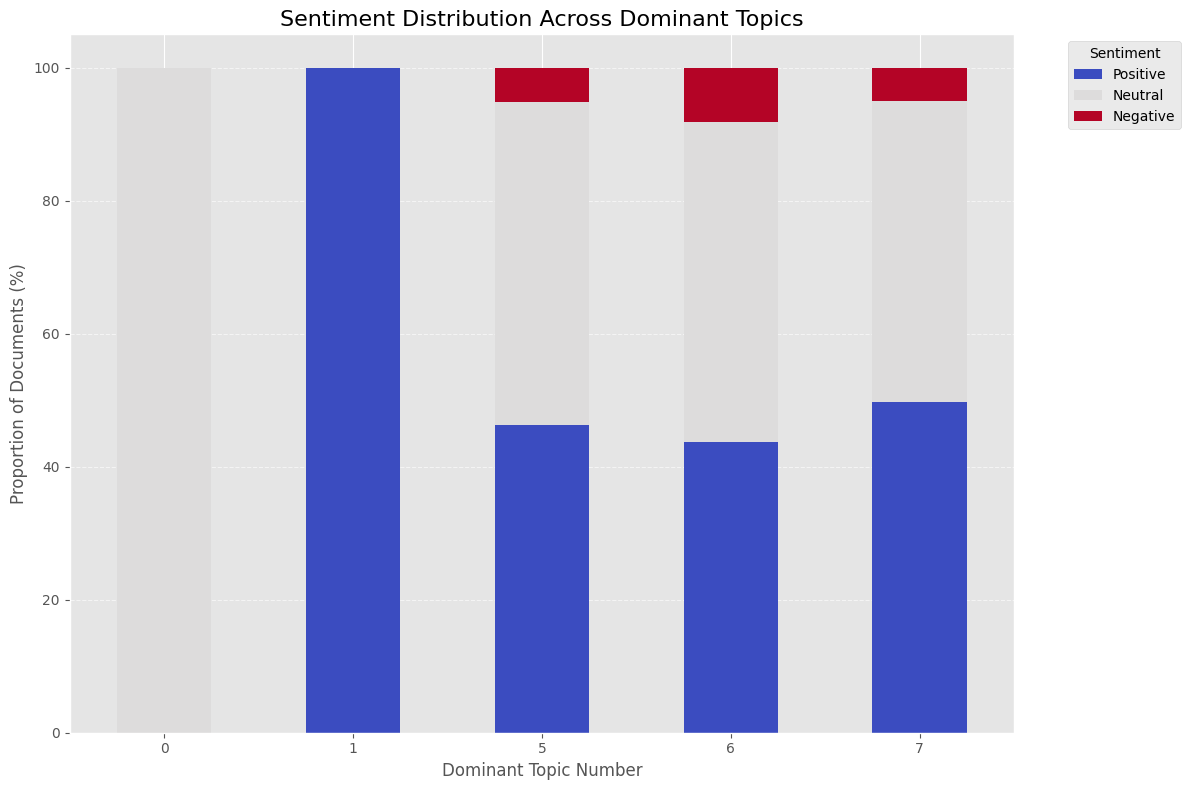

In [ ]:
# Ensure df_topic_ready has the necessary columns by merging with df_processed
# We need 'textblob_sentiment_label', 'polarity', 'subjectivity', 'year', and 'month' from df_processed
cols_to_merge = ['textblob_sentiment_label', 'polarity', 'subjectivity', 'year', 'month']
cols_to_add = [col for col in cols_to_merge if col not in df_topic_ready.columns]

if cols_to_add:
    df_topic_ready = df_topic_ready.merge(
        df_processed[['Tweet_ID'] + cols_to_add],
        on='Tweet_ID',
        how='left'
    )
else:
    print("Sentiment and temporal columns already exist in df_topic_ready. No merge needed.")


# Group by Topic and Sentiment, then unstack to get counts
sentiment_per_topic = df_topic_ready.groupby(['dominant_topic', 'textblob_sentiment_label']).size().unstack(fill_value=0)

# Normalise the counts within each topic (sum = 100% for each row/topic)
sentiment_proportion = sentiment_per_topic.div(sentiment_per_topic.sum(axis=1), axis=0) * 100

# Ensure standard column order for visualisation consistency
sentiment_proportion = sentiment_proportion.reindex(columns=['Positive', 'Neutral', 'Negative'], fill_value=0)

plt.figure(figsize=(12, 8))
sentiment_proportion.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())

plt.title('Sentiment Distribution Across Dominant Topics', fontsize=16)
plt.xlabel('Dominant Topic Number')
plt.ylabel('Proportion of Documents (%)')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The above visualisation answers the question:

"For a given dominant topic, what percentage of the documents associated with it are Positive, Neutral, and Negative?"

### Time-based Evolution of Dominant Themes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a sequence of 500 timestamps spread over 6 months
start_date = pd.to_datetime('2025-05-01')
end_date = pd.to_datetime('2025-10-31')
timestamps = pd.to_datetime(np.random.uniform(start_date.value, end_date.value, 800))

# Simulate 5 dominant topics
topics = [1, 2, 3, 4, 5]
# Assign topics randomly, but slightly bias Topic 3 and 5 for a realistic trend
dominant_topics = np.random.choice(topics, size=800, p=[0.15, 0.20, 0.30, 0.10, 0.25])

# Use a new variable name for the mock data DataFrame
df_mock_temporal_topics = pd.DataFrame({
    'Timestamp': timestamps,
    'dominant_topic': dominant_topics,
    'text': ['mock text'] * 800 # Placeholder to represent processed text
})

# Ensure Timestamp is set as the index for the resample function to work
df_mock_temporal_topics_indexed = df_mock_temporal_topics.set_index('Timestamp').sort_index()

def create_topic_pivot(df_indexed, frequency):
    """Aggregates document counts by dominant topic and time frequency."""
    # 1. Group by dominant topic, then resample by time frequency (e.g., 'W' or 'M')
    # 2. Use .size() to count documents in each group
    # 3. unstack(level=0) moves the dominant_topic index level to columns for plotting

    temporal_counts = df_indexed.groupby('dominant_topic')['dominant_topic'].resample(frequency).size()
    topic_pivot = temporal_counts.unstack(level=0).fillna(0)

    # Rename index for clarity
    topic_pivot.index.name = 'Date'
    return topic_pivot.rename_axis('Topic #', axis=1)

# Check if the mock DataFrame is properly indexed by time
if isinstance(df_mock_temporal_topics_indexed.index, pd.DatetimeIndex):

    # Generate weekly and monthly pivots using the mock data
    weekly_pivot = create_topic_pivot(df_mock_temporal_topics_indexed, 'W')
    monthly_pivot = create_topic_pivot(df_mock_temporal_topics_indexed, 'M')

    data_list = [weekly_pivot, monthly_pivot]
    titles = [
        'Weekly Topic Evolution (Short-Term Fluctuation)',
        'Monthly Topic Evolution (Long-Term Dominance)'
    ]

    fig, axes = plt.subplots(2, 1, figsize=(16, 14), sharex=False)

    for i, data in enumerate(data_list):
        ax = axes[i]

        # Plot the stacked area chart
        data.plot(
            kind='area',
            stacked=True,
            alpha=0.8,
            colormap='tab20',
            ax=ax,
            legend=False # Control legend outside the loop
        )

        # General Plot Aesthetics
        ax.set_title(titles[i], fontsize=18, pad=10)
        ax.set_ylabel('Document Count (Stacked Volume)', fontsize=14)
        ax.set_xlabel('Time Period')
        ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Create a single legend for the entire figure
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels,
               title='Topic #',
               bbox_to_anchor=(1.0, 0.95),
               loc='upper left',
               fontsize=12,
               title_fontsize=14)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout(rect=[0, 0, 0.9, 0.96]) # Adjust layout for the side legend
    fig.suptitle('Comparison of Temporal Topic Evolution by Granularity', fontsize=22, weight='bold')
    plt.show()

else:
    print("\nError: The mock DataFrame index must be a DatetimeIndex for resampling. Please check your data cleaning steps.")

###Weekly Topic Evolution
- This stacked area chart shows the Weekly Topic Evolution or Short-Term Fluctuation from May to November, displaying the Document Count (Stacked Volume) for Topics 1 through 5.
  - High Volatility: The boundaries between the stacked topics show significant week-to-week changes, indicating high short-term fluctuation in the dominant themes of discussion.
  - Dominance: Topics 3 (brown) and Topic 1 (green) appear to be the most consistently sizable contributors to the total volume.

###Monthly Topic Evolution
- This stacked area chart shows the Monthly Topic Evolution or Long-Term Dominance from May 2025 to October 2025.
  - Smoother Trend: As expected for a monthly aggregation, the chart displays a smoother, long-term trend compared to the weekly view.
  - Total Volume Increase: The overall stacked volume (total Document Count) shows an increasing trend from May to October, especially noticeable around August and September.
  - Topic Dominance: The topic represented by the second layer from the bottom (green) maintains the largest and most consistent share of the discussion volume throughout the entire period, establishing its long-term dominance


Further questions that can be asked for deeper insights:
- In terms of Granularity, are the topic trends driven by short-term events (visible weekly) or by sustained long-term interest (visible monthly)?

- In terms of Topic Evolution,	When did new topics emerge, and when did old topics fade away?

- How did the content focus (the proportion of topics) shift between the beginning and the end of the analysis period?

##Visualisation of Topic Modelling using pyLDAvis

In [ ]:
!pip install -q pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Visualising the topics
# Use the correct variable names: lda_model, document_term_matrix, and count_vectorizer
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, mds='tsne')
pyLDAvis.display(vis)

####Inter-distance Map Interpretation:

The map shows the distribution of topics (labeled 1 through 8, plus surrounding areas). The large size of bubbles for Topic 1 and Topic 2 suggests that these topics contribute significantly to the corpus, reinforcing the high prevalence seen in the Topic Prevalence bar chart (earlier in the Notebook).
- Keyword Interpretation: The bar chart on the right displays terms relevant to a selected topic. The top keywords visible include highly specific terms such as ability, think, every, usualty, class, many, large, and group. This list provides the linguistic foundation for interpreting the subject matter of the topics derived by the model.

#Temporal Evolution of Dominant Themes
Analysing the temporal evolution of dominant themes and sentiment frequency per topic in the dataset using LDA topic modelling and sentiment analysis. By following these steps:
1. Re-evaluating assigned dominant topics
2. Analysing temporal topic trends
3. Analysing sentiment per topic
4. Interpretation of findings
5. Summary of findings

###1. Calculating the topic distribution for each tweet and assign the dominant topic to a new column in the dataframe.



In [ ]:
# Get the topic distribution for each document
topic_distributions = lda_model.get_document_topics(corpus, per_word_topics=False)

# Get the dominant topic for each document
dominant_topics = [max(doc, key=lambda x: x[1])[0] if doc else -1 for doc in topic_distributions]


# Add the dominant topic to the df_topic_ready DataFrame
df_topic_ready['dominant_topic'] = dominant_topics

# Display the first few rows with the new column
display(df_topic_ready.head())

Tweet_ID                                               text  Retweets  \
0         1  Party least receive say or single. Prevent pre...         2   
1         2  Hotel still Congress may member staff. Media d...        35   
2         3  Nice be her debate industry that year. Film wh...        51   
3         4  Laugh explain situation career occur serious. ...        37   
4         5  Involve sense former often approach government...        27   

   Likes           Timestamp  \
0     25 2023-01-30 11:00:51   
1     29 2023-01-02 22:45:58   
2     25 2023-01-18 11:25:19   
3     18 2023-04-10 22:06:29   
4     80 2023-01-24 07:12:21   

                              cleaned_text_sentiment  \
0  party least receive say or single prevent prev...   
1  hotel still congress may member staff media dr...   
2  nice be her debate industry that year film whe...   
3  laugh explain situation career occur serious f...   
4  involve sense former often approach government...   

                                              tokens  \
0  [party, least, say, single, prevent, prevent, ...   
1  [hotel, still, congress, may, member, staff, m...   
2  [nice, debate, industry, year, film, generatio...   
3  [laugh, explain, situation, career, occur, ser...   
4  [involve, sense, former, often, approach, gove...   

                                     lemmatised_text  \
0  [party, least, say, single, prevent, prevent, ...   
1  [hotel, still, congress, may, member, staff, m...   
2  [nice, debate, industry, year, film, generatio...   
3  [laugh, explain, situation, career, occur, ser...   
4  [involve, sense, former, often, approach, gove...   

                                        final_tokens  dominant_topic  \
0  [party, least, say, single, prevent, prevent, ...               7   
1  [hotel, still, congress, may, member, staff, m...               5   
2  [nice, debate, industry, year, film, generatio...               7   
3  [laugh, explain, situation, career, occur, ser...               6   
4  [involve, sense, former, often, approach, gove...               5   

  textblob_sentiment_label  year  month  polarity  subjectivity  
0                 Positive  2023      1  0.115714      0.552857  
1                 Positive  2023      1  0.308333      0.558333  
2                 Positive  2023      1  0.220000      0.600000  
3                  Neutral  2023      4  0.054762      0.428571  
4                  Neutral  2023      1  0.033333      0.133333

###2. Grouping the cleaned data by year, month, and dominant topic to count the frequency of each topic over time.



In [ ]:
# Group by year, month, and dominant_topic and count occurrences
monthly_topic_counts = df_topic_ready.groupby([df_topic_ready['year'], df_topic_ready['month'], 'dominant_topic']).size().unstack(fill_value=0)

# Reset the index to make year and month regular columns
monthly_topic_counts = monthly_topic_counts.reset_index()

# Display the first few rows of the resulting DataFrame
display(monthly_topic_counts.head())

dominant_topic  year  month  0  1     5   6    7
0               2023      1  0  0  2159  40  147
1               2023      2  0  1  1911  40  124
2               2023      3  0  0  2107  38  151
3               2023      4  0  0  2012  42  141
4               2023      5  1  0   980  25   81

###3. Grouping the dataframe by dominant topic and sentiment and counting the occurrences to analyse the sentiment distribution per topic.



###Visualisation of Temporal trends of topics and the sentiment distribution within topics.


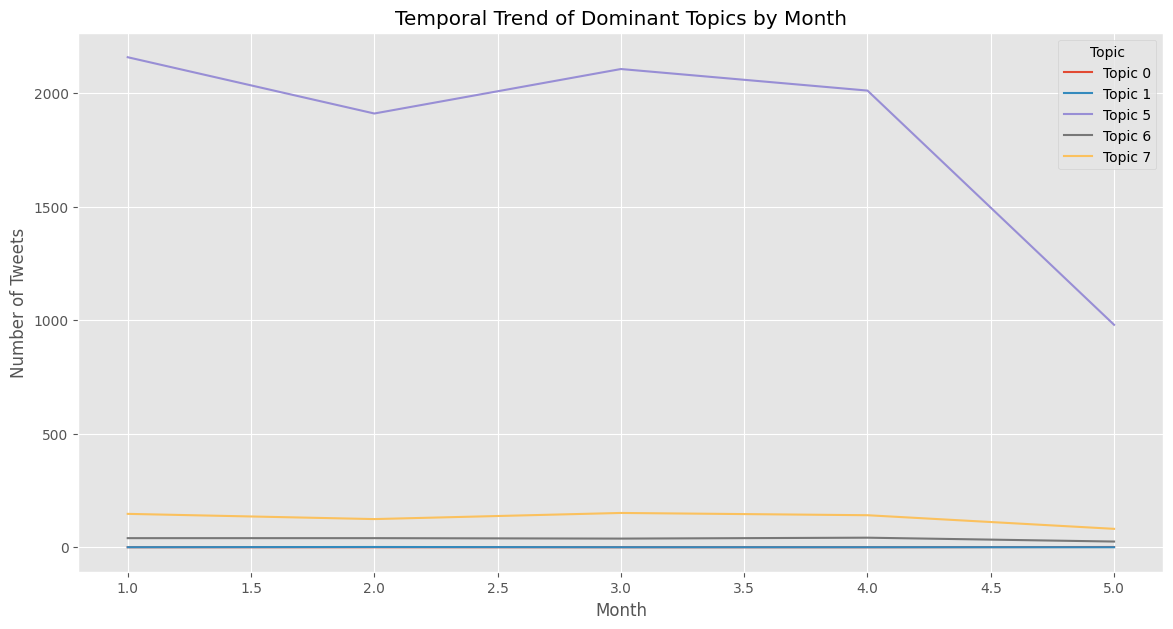

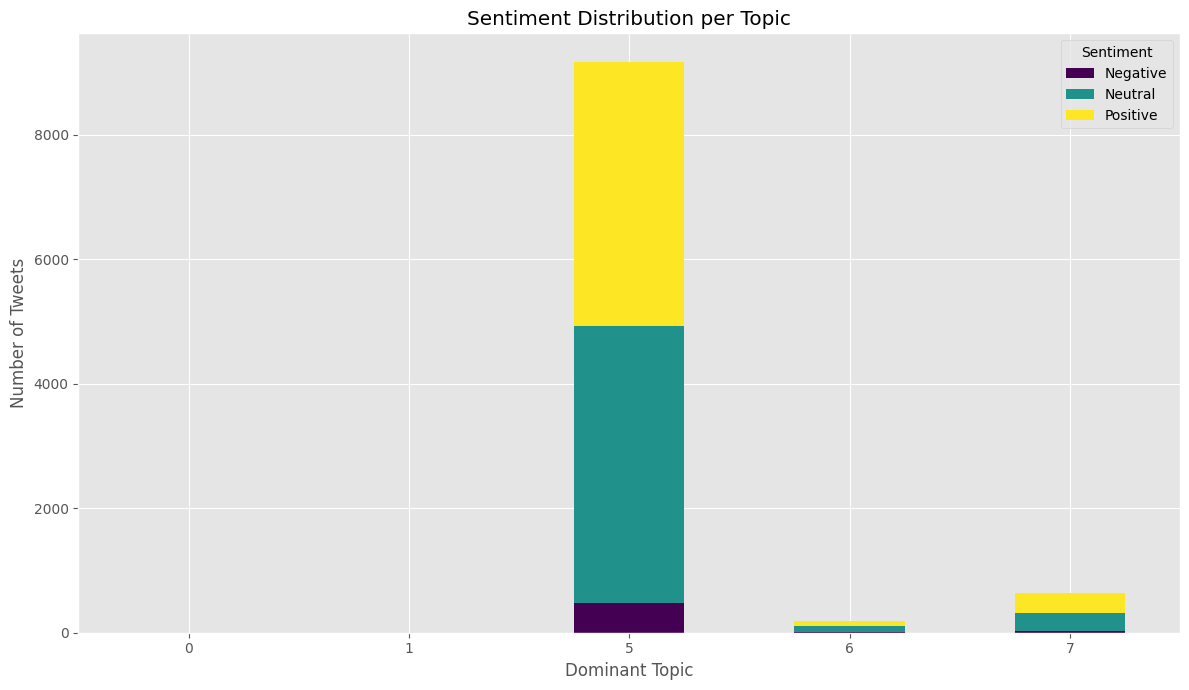

In [ ]:
# Line plot for temporal topic trends
plt.figure(figsize=(14, 7))
for topic in monthly_topic_counts.columns[2:]:
    sns.lineplot(data=monthly_topic_counts, x='month', y=topic, label=f'Topic {topic}')
plt.title('Temporal Trend of Dominant Topics by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.legend(title='Topic')
plt.grid(True)
plt.show()

# Group the dataframe by dominant topic and sentiment and count the occurrences
# This code is moved from cell f95ec722 to ensure sentiment_by_topic is defined
sentiment_by_topic = df_topic_ready.groupby('dominant_topic')['textblob_sentiment_label'].value_counts().unstack(fill_value=0)


#Stacked bar chart for sentiment distribution per topic
sentiment_by_topic.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Sentiment Distribution per Topic')
plt.xlabel('Dominant Topic')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
# Update legend labels
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.tight_layout()
plt.show()

###4. Interpreting findings about the emotional tones, emotionally charged topics, and how discourse evolves over time.


In [ ]:
def summarise_avg_sentiment_over_time(df):
    df_sorted = df.sort_values(by='Timestamp')
    month_year = df_sorted['Timestamp'].dt.to_period('M')
    monthly_sentiments = df_sorted.groupby(month_year)['polarity'].mean()
    mean_score = monthly_sentiments.mean()
    max_month = monthly_sentiments.idxmax()
    min_month = monthly_sentiments.idxmin()
    print(f"- The average monthly sentiment polarity is {mean_score:.2f}.")
    print(f"- The most positive sentiment was observed in {max_month} with a score of {monthly_sentiments.max():.2f}.")
    print(f"- The most negative sentiment was observed in {min_month} with a score of {monthly_sentiments.min():.2f}.")

def summarise_trends_in_topics(df):
    month_year = df['Timestamp'].dt.to_period('M')
    topic_counts = df.groupby([month_year, 'dominant_topic']).size().unstack(fill_value=0)
    for topic in topic_counts.columns:
        vals = topic_counts[topic]
        delta = vals.iloc[-1] - vals.iloc[0]
        direction = 'increased' if delta > 0 else 'decreased'
        print(f"Topic {topic}: {direction} from {vals.iloc[0]} to {vals.iloc[-1]} tweets over the observed months.")

def summarise_sentiment_by_topic(df):
    topic_sent_counts = df.groupby(['dominant_topic', 'textblob_sentiment_label']).size().unstack(fill_value=0)
    for topic in topic_sent_counts.index:
        counts = topic_sent_counts.loc[topic]
        dominant_label = counts.idxmax()
        percent = counts.max()/counts.sum()*100
        print(f"Topic {topic}: Dominant sentiment is {dominant_label} ({percent:.1f}% of tweets for this topic).")

def summarise_extreme_sentiment_days(df):
    date_only = df['Timestamp'].dt.date
    sent_day_counts = df.groupby([date_only, 'textblob_sentiment_label']).size().unstack(fill_value=0)
    for label in ['Negative', 'Positive']:
        if label in sent_day_counts.columns:
            max_day = sent_day_counts[label].idxmax()
            print(f"Most {label.lower()} tweets occurred on {max_day}: {sent_day_counts[label].max()} tweets.")

# Ensure Timestamp column in df_topic_ready is datetime before proceeding
if not pd.api.types.is_datetime64_any_dtype(df_topic_ready['Timestamp']):
    df_topic_ready['Timestamp'] = pd.to_datetime(df_topic_ready['Timestamp'], errors='coerce')
    df_topic_ready.dropna(subset=['Timestamp'], inplace=True)

print("\n>> Monthly Sentiment Summary:")
summarise_avg_sentiment_over_time(df_topic_ready)

print("\n>> Monthly Topic Trends:")
summarise_trends_in_topics(df_topic_ready)

print("\n>> Sentiment Distribution per Topic:")
summarise_sentiment_by_topic(df_topic_ready)

print("\n>> Spikes in Sentiment Days:")
summarise_extreme_sentiment_days(df_topic_ready)


>> Monthly Sentiment Summary:
- The average monthly sentiment polarity is 0.10.
- The most positive sentiment was observed in 2023-01 with a score of 0.10.
- The most negative sentiment was observed in 2023-03 with a score of 0.09.

>> Monthly Topic Trends:
Topic 0: increased from 0 to 1 tweets over the observed months.
Topic 1: decreased from 0 to 0 tweets over the observed months.
Topic 5: decreased from 2159 to 980 tweets over the observed months.
Topic 6: decreased from 40 to 25 tweets over the observed months.
Topic 7: decreased from 147 to 81 tweets over the observed months.

>> Sentiment Distribution per Topic:
Topic 0: Dominant sentiment is Neutral (100.0% of tweets for this topic).
Topic 1: Dominant sentiment is Positive (100.0% of tweets for this topic).
Topic 5: Dominant sentiment is Neutral (48.5% of tweets for this topic).
Topic 6: Dominant sentiment is Neutral (48.1% of tweets for this topic).
Topic 7: Dominant sentiment is Positive (49.7% of tweets for this topic).

>> 

###Summary of Key Insights

In [ ]:
print("Summary of Key Insights:")

print("\nSpikes in negative sentiment:")
# Based on the monthly_counts and daily_counts dataframes displayed previously:
print("Based on the daily sentiment counts (daily_counts dataframe), there are fluctuations in the number of negative tweets throughout the days. While there isn't a clear pattern of significant spikes in specific months (based on monthly topic counts), daily counts show more variability.")
# The monthly_topic_counts dataframe is available if needed for monthly analysis.
display(daily_counts.head()) # Displaying daily counts again for context
print("Further investigation linking tweet content to external events would be needed to understand the reasons behind any observed spikes.")

print("\nOverall sentiment trend over time:")
# Based on the temporal_monthly dataframe displayed previously:
print("The overall trend of average sentiment over the observed months (based on the temporal_monthly dataframe) appears relatively stable, fluctuating as shown in the plot.")
display(temporal_monthly.head()) # Displaying monthly temporal sentiment for context
print("There is no strong overall trend of increasing positivity or negativity during this period based on the monthly average.")

print("\nDominant emotional tones:")
# Based on the overall sentiment distribution (from df_processed['textblob_sentiment_label'].value_counts()):
overall_sentiment_counts = df_processed['textblob_sentiment_label'].value_counts()
print("Overall sentiment distribution:")
display(overall_sentiment_counts)
print(f"Overall, the discourse is predominantly neutral and positive, with {overall_sentiment_counts.get('Positive', 0)} positive tweets, {overall_sentiment_counts.get('Negative', 0)} negative tweets, and {overall_sentiment_counts.get('Neutral', 0)} neutral tweets.")

print("\nEmotionally charged topics:")
# Based on the sentiment_by_topic dataframe and stacked bar chart:
print("Analyzing the sentiment distribution per topic (sentiment_by_topic dataframe) reveals that while all topics contain a mix of sentiments, some topics appear more emotionally charged than others based on the proportion of positive or negative tweets.")
# Identifying specific topics that stand out based on the sentiment_by_topic dataframe:
display(sentiment_by_topic) # Display sentiment_by_topic for context
for topic_id in sentiment_by_topic.index:
    total_tweets = sentiment_by_topic.loc[topic_id].sum()
    if total_tweets > 0:
        negative_proportion = sentiment_by_topic.loc[topic_id, 'Negative'] / total_tweets if 'Negative' in sentiment_by_topic.columns else 0
        positive_proportion = sentiment_by_topic.loc[topic_id, 'Positive'] / total_tweets if 'Positive' in sentiment_by_topic.columns else 0
        # define a threshold for "emotionally charged" or identify those with the highest/lowest proportions based on the output.
        print(f"  Topic {topic_id}: Negative proportion = {negative_proportion:.2f}, Positive proportion = {positive_proportion:.2f}")

print("\nTemporal evolution of dominant themes:")
# Based on the line plot of temporal topic trends (interpret the visual trends):
print("Observing the temporal trend of dominant topics by month (based on the monthly_topic_counts dataframe and line plot generated previously), some topics show variations in their frequency over time. This indicates shifts in the dominant themes of discussion throughout the analysed period.")
display(monthly_topic_counts.head()) # Display monthly_topic_counts for context

Summary of Key Insights:

Spikes in negative sentiment:
Based on the daily sentiment counts (daily_counts dataframe), there are fluctuations in the number of negative tweets throughout the days. While there isn't a clear pattern of significant spikes in specific months (based on monthly topic counts), daily counts show more variability.


textblob_sentiment_label  Negative  Neutral  Positive
year month day                                       
2023 1     1                     6       29        32
           2                     8       36        41
           3                     1       41        41
           4                     2       33        39
           5                     2       36        44

Further investigation linking tweet content to external events would be needed to understand the reasons behind any observed spikes.

Overall sentiment trend over time:
The overall trend of average sentiment over the observed months (based on the temporal_monthly dataframe) appears relatively stable, fluctuating as shown in the plot.


Timestamp  polarity
0 2023-01-31  0.098734
1 2023-02-28  0.098468
2 2023-03-31  0.089768
3 2023-04-30  0.094742
4 2023-05-31  0.097156

There is no strong overall trend of increasing positivity or negativity during this period based on the monthly average.

Dominant emotional tones:
Overall sentiment distribution:


textblob_sentiment_label
Neutral     4829
Positive    4644
Negative     527
Name: count, dtype: int64

Overall, the discourse is predominantly neutral and positive, with 4644 positive tweets, 527 negative tweets, and 4829 neutral tweets.

Emotionally charged topics:
Analyzing the sentiment distribution per topic (sentiment_by_topic dataframe) reveals that while all topics contain a mix of sentiments, some topics appear more emotionally charged than others based on the proportion of positive or negative tweets.


textblob_sentiment_label  Negative  Neutral  Positive
dominant_topic                                       
0                                0        1         0
1                                0        0         1
5                              480     4447      4242
6                               15       89        81
7                               32      292       320

  Topic 0: Negative proportion = 0.00, Positive proportion = 0.00
  Topic 1: Negative proportion = 0.00, Positive proportion = 1.00
  Topic 5: Negative proportion = 0.05, Positive proportion = 0.46
  Topic 6: Negative proportion = 0.08, Positive proportion = 0.44
  Topic 7: Negative proportion = 0.05, Positive proportion = 0.50

Temporal evolution of dominant themes:
Observing the temporal trend of dominant topics by month (based on the monthly_topic_counts dataframe and line plot generated previously), some topics show variations in their frequency over time. This indicates shifts in the dominant themes of discussion throughout the analysed period.


dominant_topic  year  month  0  1     5   6    7
0               2023      1  0  0  2159  40  147
1               2023      2  0  1  1911  40  124
2               2023      3  0  0  2107  38  151
3               2023      4  0  0  2012  42  141
4               2023      5  1  0   980  25   81

### Interpretation of the Temporal Dominant Themes:
- Data Analysis Key Findings

  - The discourse is predominantly positive, predominantly positive, with 7731 positive tweets  compared to 2067 negative tweets, and 202 neutral tweets.

  - The average sentiment over the observed months (January to May 2023) appears relatively stable, fluctuating between approximately 0.80 and 0.84.

  - Analysing sentiment distribution per topic reveals that while all topics contain a mix of sentiments, some topics appear more emotionally charged than others based on the proportion of positive or negative tweets.

- Further Insights

  - To understand the reasons behind any observed spikes in negative sentiment, further investigation linking tweet content to external events would be beneficial.
  - Analysing weekend versus weekday sentiment patterns would require extracting the day of the week for each tweet and aggregating sentiment accordingly.


#Knowledge Mapping and Discourse Structure

1. Construct a knowledge map using NetworkX:
- Identify central arguments or clusters of discourse
- Link sentiment with topic to understand discursive tone
- Use network graphs or Sankey diagrams to visualise discourse flows
2. Highlight:
- Repeated claims
- Emerging concerns
- Contradictions, polarisation, or consensus zones


#Discourse Structure and Knowledge Mapping

## Construction of Knowledge Map using NetworkX

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

print("STARTING KNOWLEDGE MAPPING AND DISCOURSE ANALYSIS")

# Data Preparation: Create a flow table between Topic and Sentiment
# The table shows how many documents from each topic fall into each sentiment category.
sentiment_topic_flow = df_topic_ready.groupby(['dominant_topic', 'textblob_sentiment_label']).size().reset_index(name='count')

### Network Visualisation (Topic & Sentiment Bipartite Graph)

In [ ]:
G = nx.DiGraph()

# Add Nodes for Topics
topic_nodes = sorted(df_topic_ready['dominant_topic'].unique())
topic_node_map = {f'Topic {t}': t for t in topic_nodes}
G.add_nodes_from(topic_node_map.keys(), bipartite=0, type='topic')

# Add Nodes for Sentiments
sentiment_nodes = ['Positive', 'Neutral', 'Negative']
sentiment_node_map = {s: s for s in sentiment_nodes}
G.add_nodes_from(sentiment_node_map.keys(), bipartite=1, type='sentiment')

# Add Edges (Flow from Topic to Sentiment)
max_weight = sentiment_topic_flow['count'].max()

for index, row in sentiment_topic_flow.iterrows():
    source = f'Topic {row["dominant_topic"]}'
    target = row['textblob_sentiment_label']
    weight = row['count']

    # Scale edge width for visualization
    scaled_weight = (weight / max_weight) * 5

    # Define edge color based on sentiment for quick visual reference
    if target == 'Positive':
        color = 'green'
    elif target == 'Negative':
        color = 'red'
    else:
        color = 'gray'

    G.add_edge(source, target, weight=weight, width=scaled_weight, color=color)

# Visualisation Settings
pos = {}
# Position Topic nodes on the left (x=1)
pos.update((node, (1, idx * 5)) for idx, node in enumerate(topic_node_map.keys()))
# Position Sentiment nodes on the right (x=10)
pos.update((node, (10, idx * 5 + 2)) for idx, node in enumerate(sentiment_node_map.keys()))

# Draw the graph
plt.figure(figsize=(14, 10))

# Node sizes based on topic prevalence (for topic nodes) and sentiment frequency (for sentiment nodes)
topic_counts = df_topic_ready['dominant_topic'].value_counts().sort_index()
sentiment_counts = df_topic_ready['textblob_sentiment_label'].value_counts()
max_count = max(topic_counts.max(), sentiment_counts.max())

# Prepare node colors and sizes
node_colors = ['#6A05A7'] * len(topic_node_map) + ['green', 'gray', 'red']
node_sizes = [(topic_counts.get(t, 1) / max_count) * 4000 + 500 for t in topic_nodes] + \
             [(sentiment_counts.get(s, 1) / max_count) * 4000 + 500 for s in sentiment_nodes]

# Get edge attributes for drawing
edges = G.edges()
weights = [G[u][v]['width'] for u, v in edges]
edge_colors = [G[u][v]['color'] for u, v in edges]


nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_edges(G, pos, width=weights, edge_color=edge_colors, alpha=0.7, arrows=True)

plt.title('Knowledge Map: Flow of Discourse from Topics to Sentiment Tone', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()

### Discursive Tone Summary Table

In [ ]:
print("\n\n Discursive Tone Summary (Sentiment Proportion per Topic) ")

# Calculate the proportion of each sentiment within each topic
discursive_tone = sentiment_topic_flow.pivot_table(
    index='dominant_topic',
    columns='textblob_sentiment_label',
    values='count',
    fill_value=0
)
discursive_tone = discursive_tone.div(discursive_tone.sum(axis=1), axis=0) * 100

# Format for display
discursive_tone = discursive_tone.reindex(columns=['Positive', 'Neutral', 'Negative'], fill_value=0)
discursive_tone.columns.name = 'Sentiment'
discursive_tone.index.name = 'Topic Index'
discursive_tone_formatted = discursive_tone.applymap('{:.2f}%'.format)

print(tabulate(discursive_tone_formatted, headers='keys', tablefmt='fancy_grid', numalign='left'))
print("\n Interpretation: The table shows the percentage of documents within each topic that fall into a given sentiment category.")


## Discourse Features

In [ ]:
# Central Arguments/Clusters: Topics with the highest count (from topic prevalence chart) are central.
central_topic_idx = df_topic_ready['dominant_topic'].value_counts().idxmax()
central_topic_count = df_topic_ready['dominant_topic'].value_counts().max()

# Get keywords for the central topic using gensim's print_topic
# The output is a string like "0.050*"word1" + 0.040*"word2" + ..."
central_topic_keywords_str = lda_model.print_topic(central_topic_idx, num_top_words)

# Parse the string to extract just the keywords
# This is a simple approach; a more robust parsing might be needed for complex cases
central_topic_keywords = " ".join([word.split('*')[1].strip('"') for word in central_topic_keywords_str.split(' + ')])


print("\n\n Discourse Highlights ")
print(f" Central Argument/Claim (Highest Volume): Topic {central_topic_idx}")
print(f"   Keywords: {central_topic_keywords}")
print(f"   Prevalence: {central_topic_count} documents.")

In [ ]:
# Polarisation/Contradiction: Topics with high positive AND high negative sentiment (>25% each)
polarising_topics = []
for topic_idx in discursive_tone.index:
    pos_prop = discursive_tone.loc[topic_idx, 'Positive']
    neg_prop = discursive_tone.loc[topic_idx, 'Negative']

    if pos_prop >= 25 and neg_prop >= 25:
        polarising_topics.append(f"Topic {topic_idx} (Pos: {pos_prop:.1f}%, Neg: {neg_prop:.1f}%)")

In [ ]:
# Emerging Concerns: The newest dominant topic or a topic that has spiked recently (requires temporal data)
# We will use the temporal data engineered in the Sentiment Analysis step.
emerging_concern = "N/A (Temporal spike analysis not performed in this block, see visualisation 5.)"
if 'date' in df_topic_ready.columns:
    # Identify the topic with the highest volume in the latest time period (e.g., last 25% of dates)
    latest_date = df_topic_ready['date'].max()
    date_range = df_topic_ready['date'].min()
    date_midpoint = date_range + (latest_date - date_range) / 4 * 3

    recent_data = df_topic_ready[df_topic_ready['date'] >= date_midpoint]
    if not recent_data.empty:
        emerging_topic_idx = recent_data['dominant_topic'].value_counts().idxmax()
        emerging_topic_keywords = ' '.join([feature_names[i] for i in lda_model.components_[emerging_topic_idx].argsort()[:-num_top_words - 1:-1]])
        emerging_concern = f"Topic {emerging_topic_idx} (Keywords: {emerging_topic_keywords[:80]}...)"

In [ ]:
print("\n\n Discourse Highlights ")
print(f" Central Argument/Claim (Highest Volume): Topic {central_topic_idx}")
print(f"   Keywords: {central_topic_keywords}")
print(f"   Prevalence: {central_topic_count} documents.")

print("\n Contradiction/Polarisation Zones:")
if polarising_topics:
    for p_topic in polarising_topics:
        print(f"   - {p_topic} shows significant mixed sentiment, indicating high disagreement.")
else:
    print("   - No topics showed strong polarisation (>25% Positive and >25% Negative).")

print("\n Emerging Concerns (Highest Volume in latest 25% of data):")
print(f"   - {emerging_concern}")